## CÓDIGO PARA ENCONTRAR LOS DIÁMETROS DE LOS OBJETOS PUNTUALES DE UNA IMAGEN FITS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.utils.exceptions import AstropyUserWarning
from photutils.psf import extract_stars
from astropy.nddata import NDData
from astropy.table import Table
from astropy.table import QTable
from astropy.stats import  mad_std
from astropy.stats import sigma_clipped_stats
from astropy.wcs import WCS
from photutils.aperture import CircularAperture
from photutils.detection import DAOStarFinder
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
import pandas as pd
import warnings
from photutils.psf import PSFPhotometry
from photutils.psf import IntegratedGaussianPRF
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings("ignore")

In [2]:
# Open FITS file con astrometria
#file_path = "/Users/alejandralemus/Documents/diciembre 20 2024/Filtro B/Img_corr_B/SUM_Astro_Filter_B.fits"  # Reemplaza con la ruta a tu archivo FITS
#file_path = "/Users/alejandralemus/Documents/diciembre 20 2024/Filtro V/Img_corr_V/SUM_Aligned_Stack_Filter_V.fits"  # Reemplaza con la ruta a tu archivo FITS
#file_path = "/Users/alejandralemus/Documents/diciembre 20 2024/Filtro R/Img_corr_R/SUM_Aligned_Stack_Filter_R.fits"  # Reemplaza con la ruta a tu archivo FITS
#file_path = "/Users/alejandralemus/Documents/diciembre 20 2024/Filtro I/Img_corr_I/SUM_Aligned_Stack_Filter_I.fits"  # Reemplaza con la ruta a tu archivo FITS
file_path = "/Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits"  # Reemplaza con la ruta a tu archivo FITS
star_square_size = 9

Procesando con FWHM=10 y threshold=8
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 54 estrellas en total


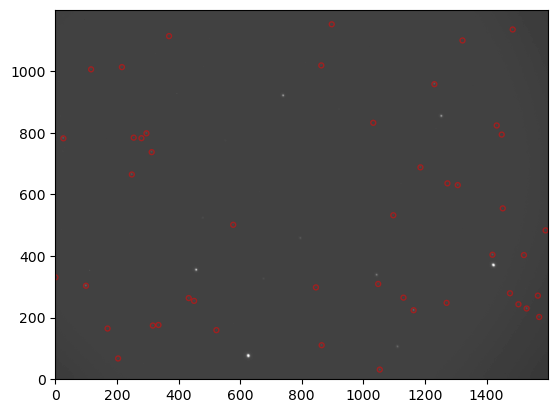

Se procesaron: 46 estrellas
....
No se pudieron determinar los radios de 27


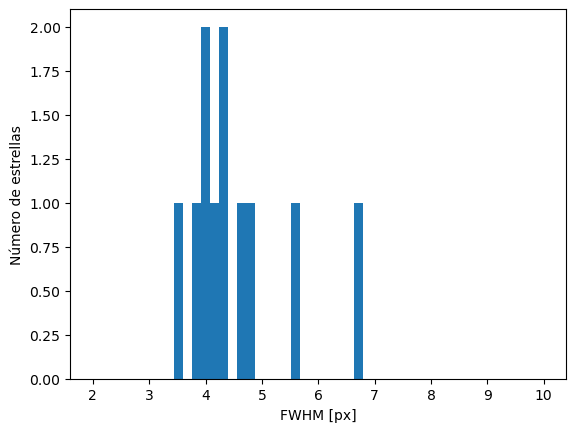

[3.56230447 3.83084976 3.93817256 3.99182051 4.1400744  4.29254596
 4.37485846 4.63650036 4.77452103 5.59770292 6.79683216        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 46 estrellas  son:
....
Promedio: 4.540
....
Mediana: 4.293
....
Desviación estandar: 0.887
Procesando con FWHM=10 y threshold=7
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 56 estrellas en total


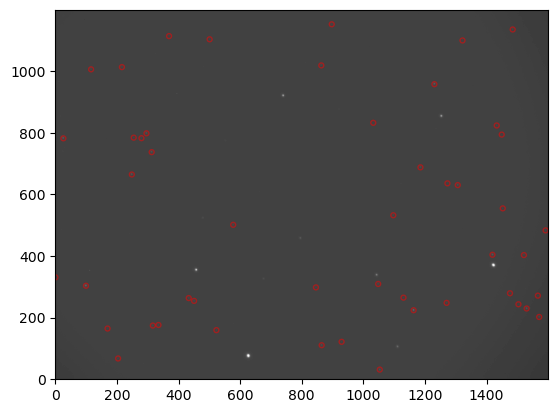

Se procesaron: 48 estrellas
....
No se pudieron determinar los radios de 27


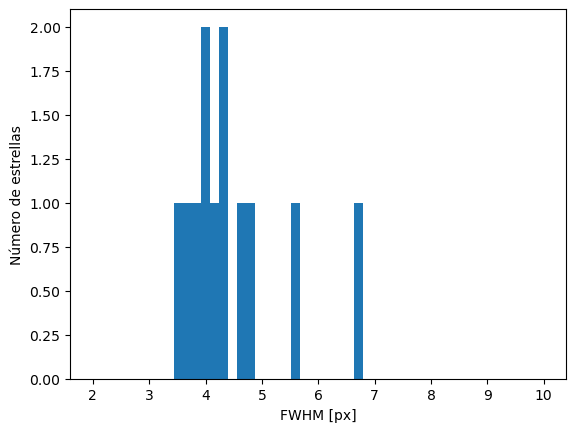

[3.56230447 3.60640795 3.83084976 3.93817256 3.99182051 4.1400744
 4.29254596 4.37485846 4.63650036 4.77452103 5.59770292 6.79683216
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 48 estrellas  son:
....
Promedio: 4.462
....
Mediana: 4.216
....
Desviación estandar: 0.887
Procesando con FWHM=10 y threshold=6
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 61 estrellas en total


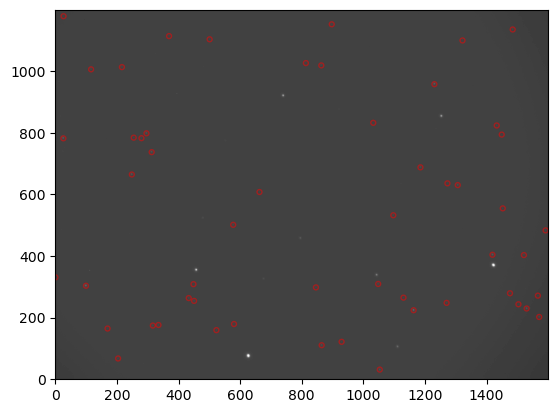

Se procesaron: 53 estrellas
....
No se pudieron determinar los radios de 28


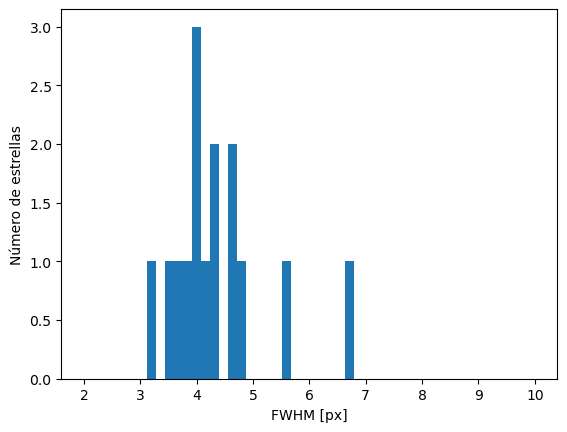

[3.14514797 3.56230447 3.60640795 3.83084976 3.93817256 3.99182051
 4.0699467  4.1400744  4.29254596 4.37485846 4.58986512 4.63650036
 4.77452103 5.59770292 6.79683216        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 53 estrellas  son:
....
Promedio: 4.357
....
Mediana: 4.140
....
Desviación estandar: 0.863
Procesando con FWHM=10 y threshold=5
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 67 estrellas en total


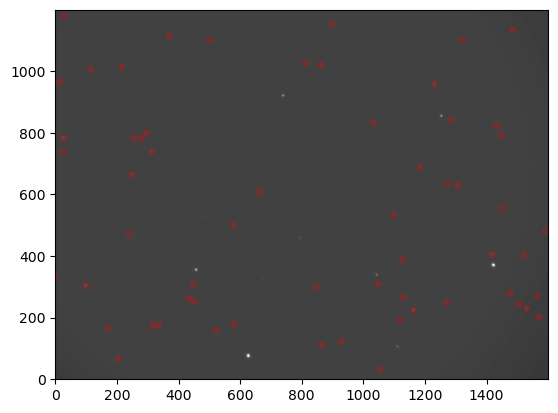

Se procesaron: 59 estrellas
....
No se pudieron determinar los radios de 31


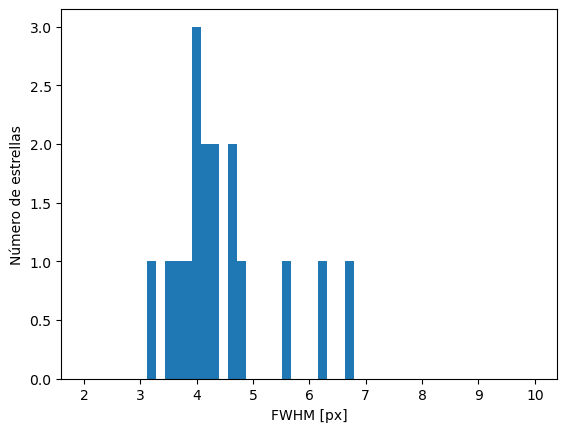

[3.14514797 3.56230447 3.60640795 3.83084976 3.93817256 3.99182051
 4.0699467  4.1400744  4.18563555 4.29254596 4.37485846 4.58986512
 4.63650036 4.77452103 5.59770292 6.31171161 6.79683216        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 59 estrellas  son:
....
Promedio: 4.461
....
Mediana: 4.186
....
Desviación estandar: 0.935
Procesando con FWHM=10 y threshold=4
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.1770237345

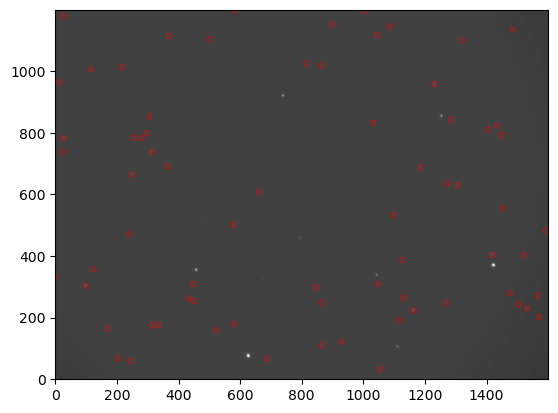

Se procesaron: 68 estrellas
....
No se pudieron determinar los radios de 36


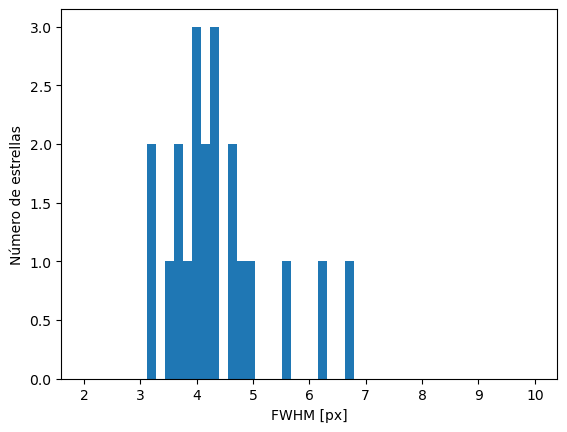

[3.14514797 3.22166293 3.56230447 3.60626075 3.60640795 3.83084976
 3.93817256 3.99182051 4.0699467  4.1400744  4.18563555 4.27829138
 4.29254596 4.37485846 4.58986512 4.63650036 4.77452103 4.91786043
 5.59770292 6.31171161 6.79683216        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 68 estrellas  son:
....
Promedio: 4.375
....
Mediana: 4.186
....
Desviación estandar: 0.905
Procesando con FWHM=10 y threshold=3
Procesando archivo: /Users/alejandralemus/Docume

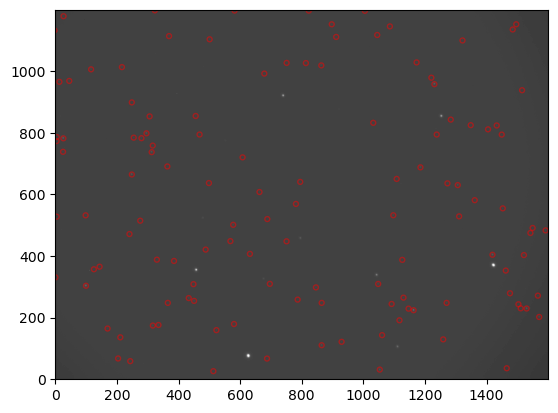

Se procesaron: 117 estrellas
....
No se pudieron determinar los radios de 70


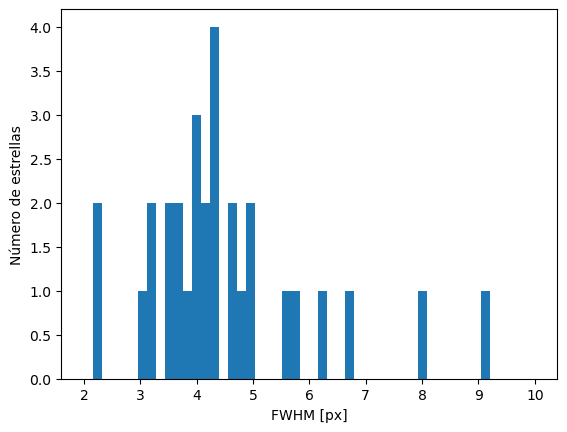

[2.16529638 2.2265192  3.01045457 3.14514797 3.22166293 3.49897561
 3.56230447 3.60626075 3.60640795 3.83084976 3.93817256 3.99182051
 4.0699467  4.1400744  4.18563555 4.27189537 4.27829138 4.29254596
 4.37485846 4.58986512 4.63650036 4.77452103 4.91786043 4.96877377
 5.59770292 5.68879441 6.31171161 6.79683216 8.06691971 9.16362991
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan       

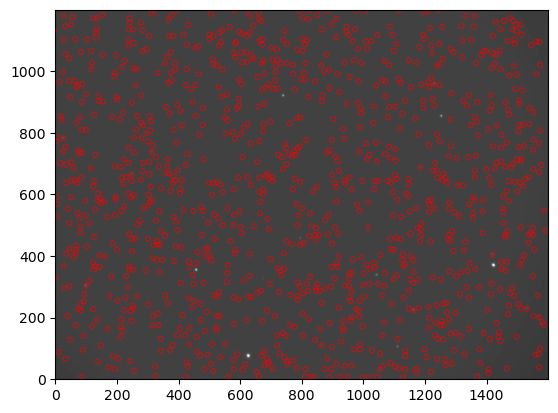

Se procesaron: 1099 estrellas
....
No se pudieron determinar los radios de 722


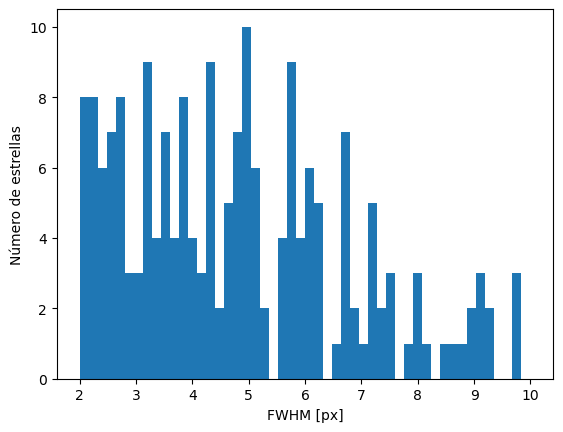

[1.00895521 1.00985013 1.12282222 ...        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 1099 estrellas  son:
....
Promedio: 4.878
....
Mediana: 4.278
....
Desviación estandar: 4.110
Procesando con FWHM=9 y threshold=8
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 54 estrellas en total


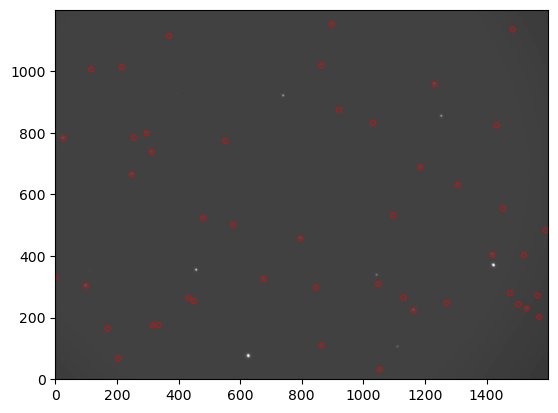

Se procesaron: 46 estrellas
....
No se pudieron determinar los radios de 29


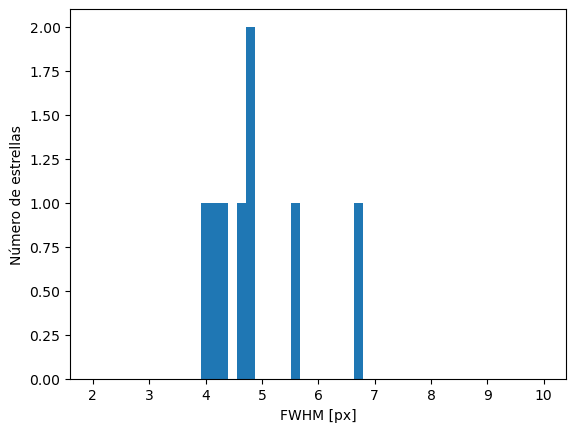

[3.93817256 4.1400744  4.37485846 4.63650036 4.7506571  4.77452103
 5.59770292 6.79683216        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 46 estrellas  son:
....
Promedio: 4.876
....
Mediana: 4.694
....
Desviación estandar: 0.864
Procesando con FWHM=9 y threshold=7
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 60 estrellas en total


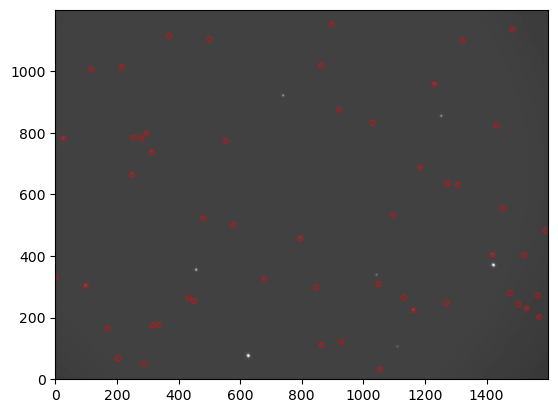

Se procesaron: 52 estrellas
....
No se pudieron determinar los radios de 30


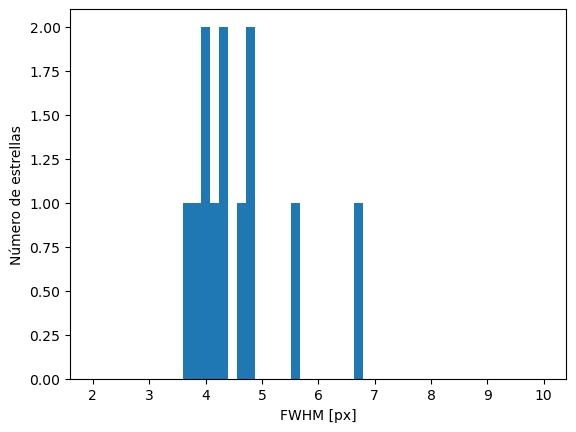

[3.60640795 3.83084976 3.93817256 3.99182051 4.1400744  4.29254596
 4.37485846 4.63650036 4.7506571  4.77452103 5.59770292 6.79683216
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 52 estrellas  son:
....
Promedio: 4.561
....
Mediana: 4.334
....
Desviación estandar: 0.847
Procesando con FWHM=9 y threshold=6
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 64 estrellas en total


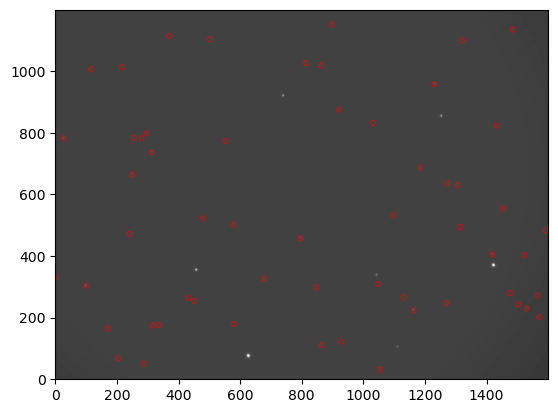

Se procesaron: 56 estrellas
....
No se pudieron determinar los radios de 31


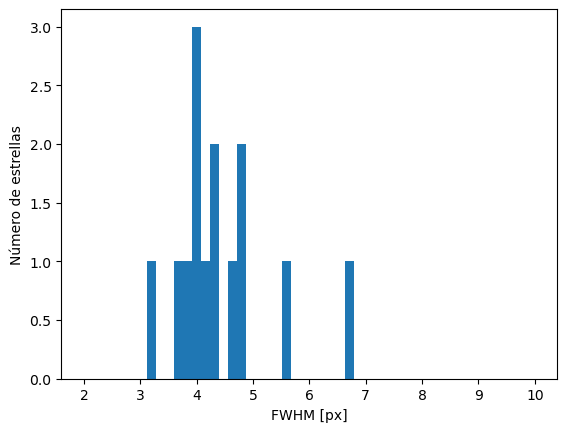

[3.14514797 3.60640795 3.83084976 3.93817256 3.99182051 4.0699467
 4.1400744  4.29254596 4.37485846 4.63650036 4.7506571  4.77452103
 5.59770292 6.79683216        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 56 estrellas  son:
....
Promedio: 4.425
....
Mediana: 4.216
....
Desviación estandar: 0.870
Procesando con FWHM=9 y threshold=5
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 72 estrellas en to

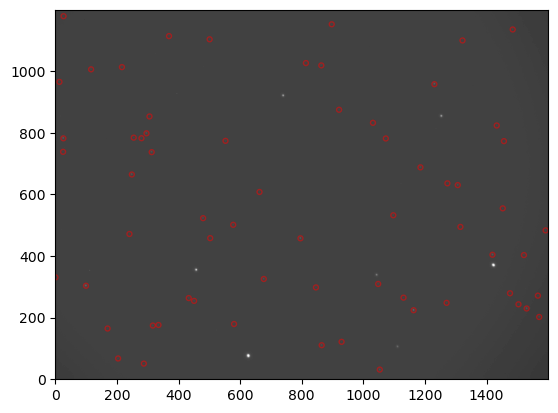

Se procesaron: 64 estrellas
....
No se pudieron determinar los radios de 34


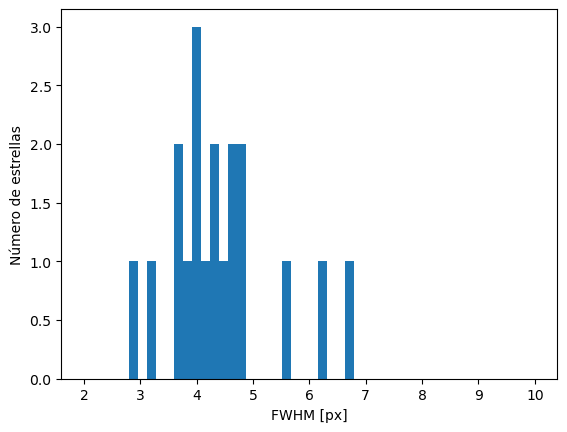

[2.91062561 3.14514797 3.60626075 3.60640795 3.83084976 3.93817256
 3.99182051 4.0699467  4.1400744  4.29254596 4.37485846 4.49393789
 4.58986512 4.63650036 4.7506571  4.77452103 5.59770292 6.31171161
 6.79683216        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 64 estrellas  son:
....
Promedio: 4.414
....
Mediana: 4.293
....
Desviación estandar: 0.950
Procesando con FWHM=9 y threshold=4
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM

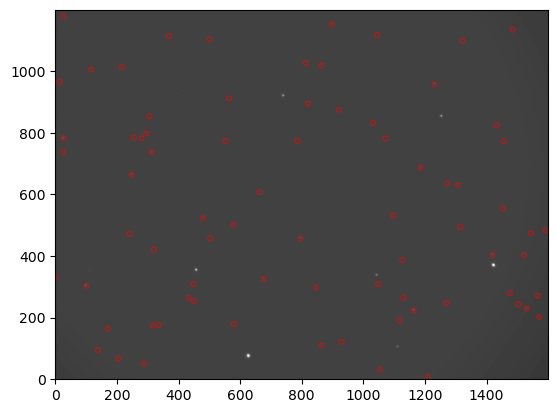

Se procesaron: 75 estrellas
....
No se pudieron determinar los radios de 42


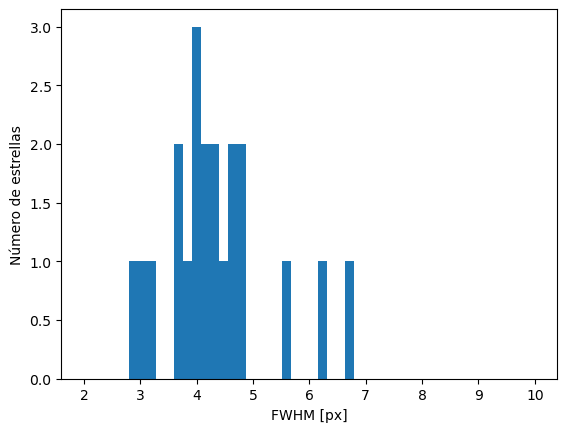

[2.91062561 2.99900994 3.14514797 3.60626075 3.60640795 3.83084976
 3.93817256 3.99182051 4.0699467  4.1400744  4.18563555 4.29254596
 4.37485846 4.49393789 4.58986512 4.63650036 4.7506571  4.77452103
 5.59770292 6.31171161 6.79683216        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 75 estrellas  son:
....
Promedio: 4.335
....
Mediana: 4.186
....
Desviación estandar: 0.953
Procesa

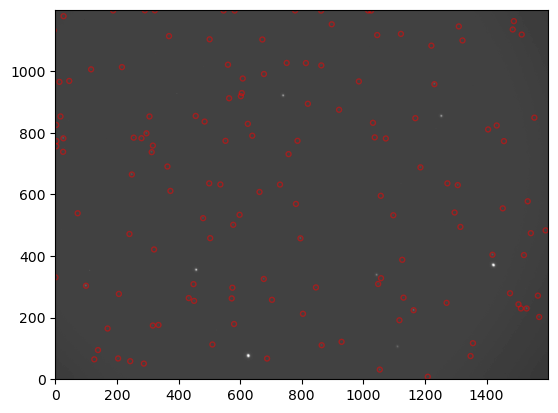

Error con FWHM=9 y threshold=3: `x0` is infeasible.
Procesando con FWHM=9 y threshold=2
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 1456 estrellas en total


Error con FWHM=9 y threshold=2: `x0` is infeasible.
Procesando con FWHM=8 y threshold=8
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 53 estrellas en total


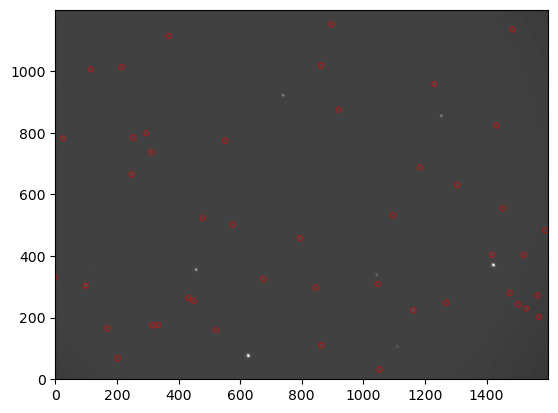

Se procesaron: 45 estrellas
....
No se pudieron determinar los radios de 28


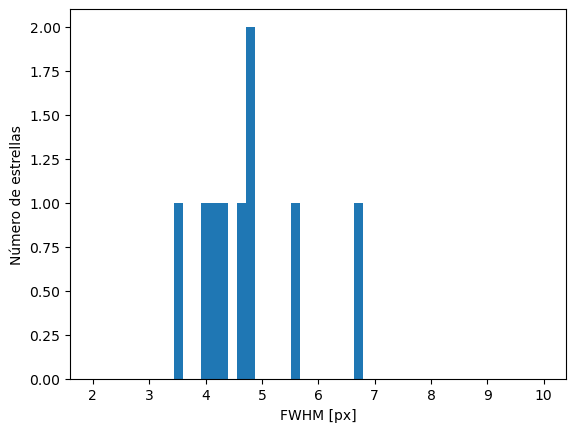

[3.56230447 3.93817256 4.1400744  4.37485846 4.63650036 4.7506571
 4.77452103 5.59770292 6.79683216        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 45 estrellas  son:
....
Promedio: 4.730
....
Mediana: 4.637
....
Desviación estandar: 0.913
Procesando con FWHM=8 y threshold=7
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 60 estrellas en total


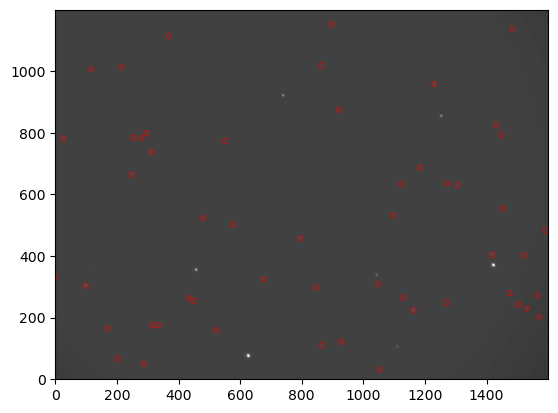

Se procesaron: 52 estrellas
....
No se pudieron determinar los radios de 30


[3.56230447 3.83084976 3.93817256 3.99182051 4.07771032 4.1400744
 4.37485846 4.63650036 4.7506571  4.77452103 5.59770292 6.79683216
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 52 estrellas  son:
....
Promedio: 4.539
....
Mediana: 4.257
....
Desviación estandar: 0.858
Procesando con FWHM=8 y threshold=6
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 63 estrellas en total


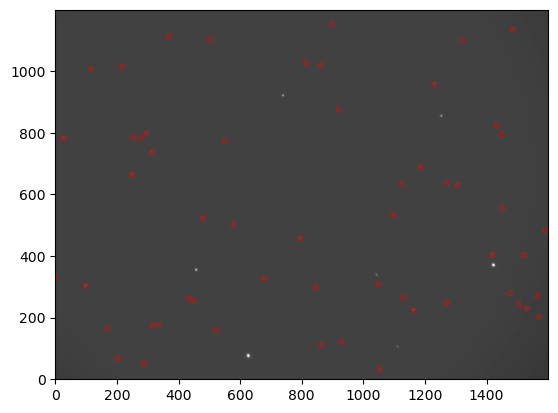

Se procesaron: 55 estrellas
....
No se pudieron determinar los radios de 30


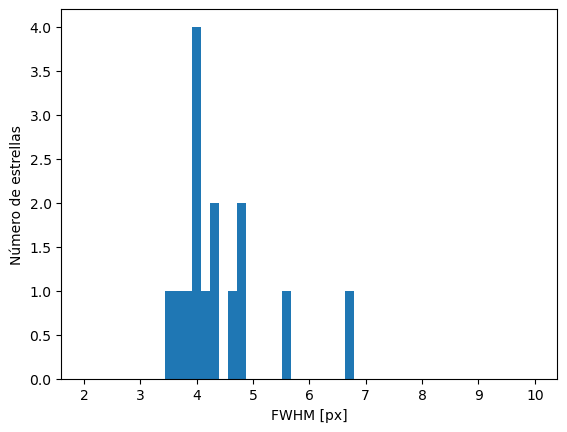

[3.56230447 3.60640795 3.83084976 3.93817256 3.99182051 4.0699467
 4.07771032 4.1400744  4.29254596 4.37485846 4.63650036 4.7506571
 4.77452103 5.59770292 6.79683216        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan]
Los parámetros estadísticos de los diámetros encontrados para 55 estrellas  son:
....
Promedio: 4.429
....
Mediana: 4.140
....
Desviación estandar: 0.809
Procesando con FWHM=8 y threshold=5
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 70 estrellas en total


Se procesaron: 62 estrellas
....
No se pudieron determinar los radios de 31


[2.91062561 3.14514797 3.56230447 3.60626075 3.60640795 3.83084976
 3.93817256 3.99182051 4.0699467  4.07771032 4.1400744  4.29254596
 4.37485846 4.58986512 4.63650036 4.7506571  4.77452103 5.59770292
 6.79683216        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 62 estrellas  son:
....
Promedio: 4.247
....
Mediana: 4.078
....
Desviación estandar: 0.853
Procesando con FWHM=8 y threshold=4
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_

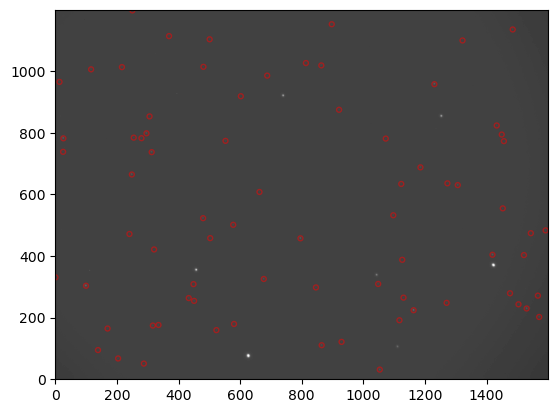

Se procesaron: 73 estrellas
....
No se pudieron determinar los radios de 37


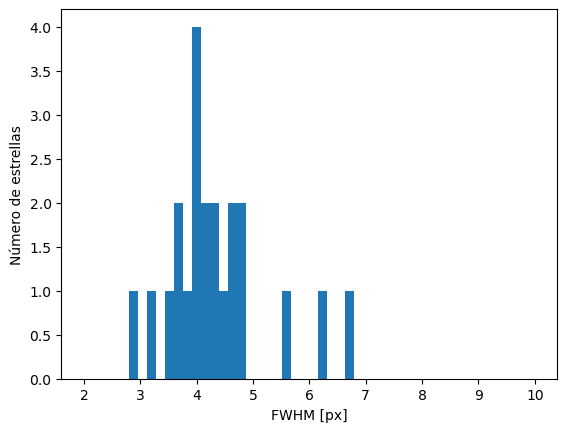

[1.64367936 2.91062561 3.14514797 3.56230447 3.60626075 3.60640795
 3.83084976 3.93817256 3.99182051 4.0699467  4.07771032 4.1400744
 4.18563555 4.29254596 4.37485846 4.49393789 4.58986512 4.63650036
 4.7506571  4.77452103 5.59770292 6.31171161 6.79683216        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan]
Los parámetros estadísticos de los diámetros encontrados para 73 estrellas  son:
....
Promedio: 4.232
....
Mediana: 4.140
....
Desviación estandar: 1.041
Procesando con FWHM=8 y thresh

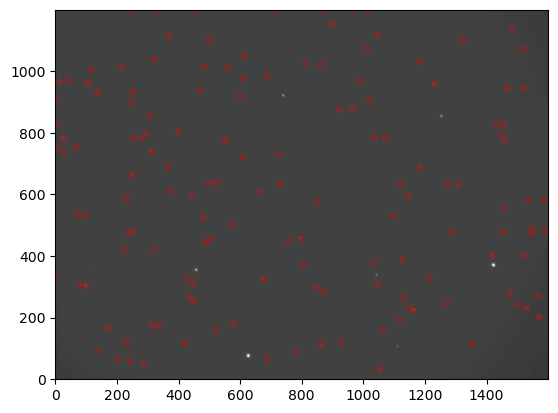

Error con FWHM=8 y threshold=3: `x0` is infeasible.
Procesando con FWHM=8 y threshold=2
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 1779 estrellas en total


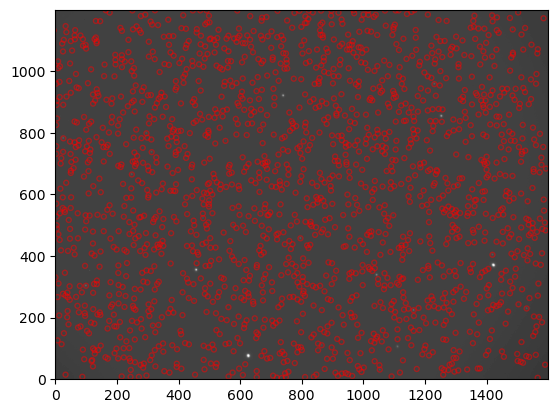

Error con FWHM=8 y threshold=2: `x0` is infeasible.
Procesando con FWHM=7 y threshold=8
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 47 estrellas en total


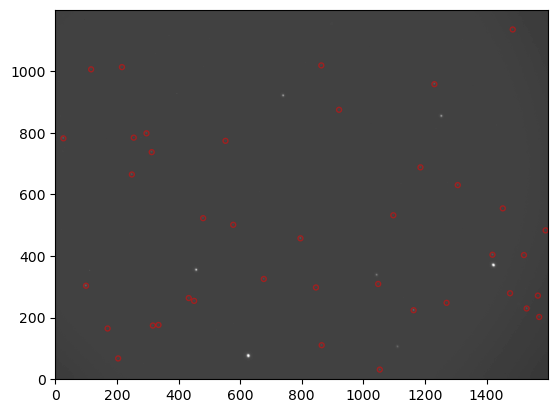

Se procesaron: 40 estrellas
....
No se pudieron determinar los radios de 26


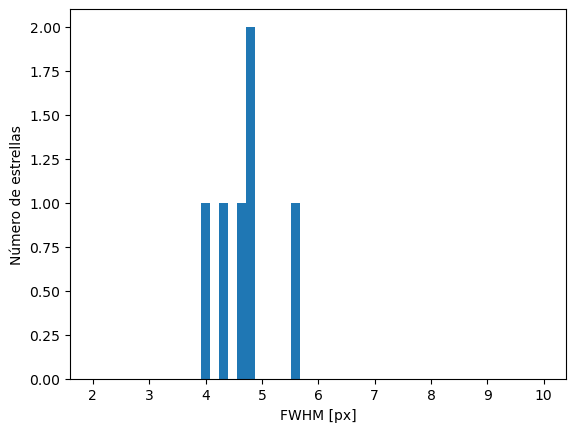

[3.93817256 4.37485846 4.63650036 4.7506571  4.77452103 5.59770292
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 40 estrellas  son:
....
Promedio: 4.679
....
Mediana: 4.694
....
Desviación estandar: 0.500
Procesando con FWHM=7 y threshold=7
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 52 estrellas en total


Se procesaron: 45 estrellas
....
No se pudieron determinar los radios de 27


[3.56230447 3.93817256 4.07771032 4.1400744  4.37485846 4.63650036
 4.7506571  4.77452103 5.59770292        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 45 estrellas  son:
....
Promedio: 4.428
....
Mediana: 4.375
....
Desviación estandar: 0.561
Procesando con FWHM=7 y threshold=6
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 60 estrellas en total


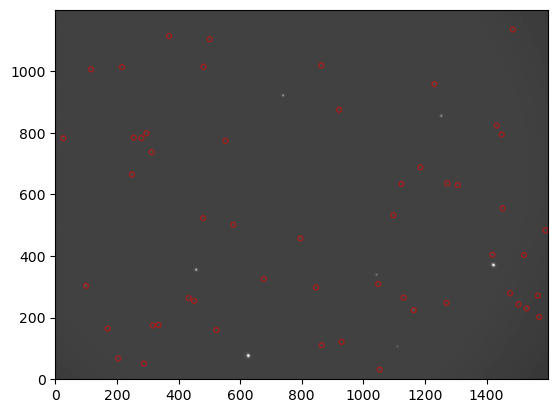

Se procesaron: 53 estrellas
....
No se pudieron determinar los radios de 30


[3.56230447 3.60640795 3.83084976 3.93817256 3.99182051 4.07771032
 4.1400744  4.37485846 4.63650036 4.7506571  4.77452103 5.59770292
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 53 estrellas  son:
....
Promedio: 4.273
....
Mediana: 4.109
....
Desviación estandar: 0.560
Procesando con FWHM=7 y threshold=5
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 66 estrellas en total


Se procesaron: 59 estrellas
....
No se pudieron determinar los radios de 30


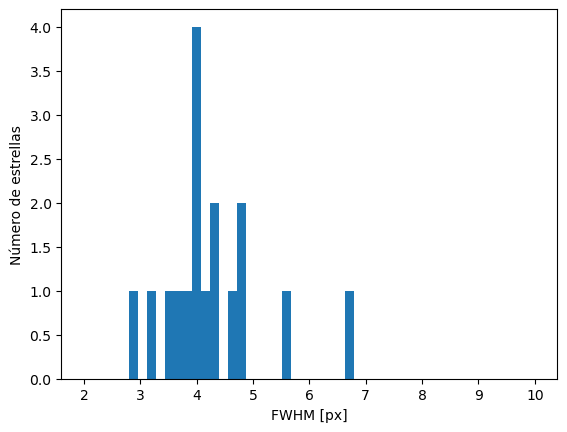

[2.91062561 3.14514797 3.56230447 3.60640795 3.83084976 3.93817256
 3.99182051 4.0699467  4.07771032 4.1400744  4.29254596 4.37485846
 4.63650036 4.7506571  4.77452103 5.59770292 6.79683216        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 59 estrellas  son:
....
Promedio: 4.265
....
Mediana: 4.078
....
Desviación estandar: 0.885
Procesando con FWHM=7 y threshold=4
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457

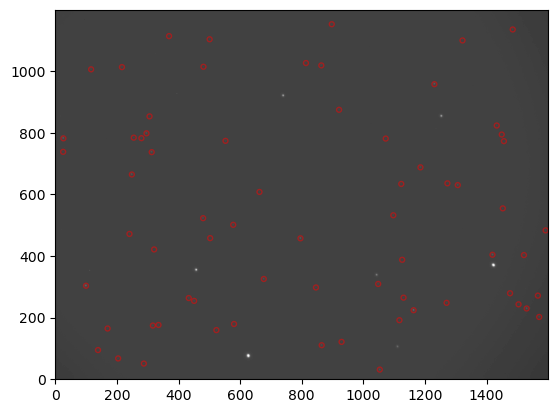

Se procesaron: 68 estrellas
....
No se pudieron determinar los radios de 35


[2.91062561 3.14514797 3.56230447 3.60626075 3.60640795 3.83084976
 3.93817256 3.99182051 4.0699467  4.07771032 4.1400744  4.18563555
 4.29254596 4.37485846 4.49393789 4.58986512 4.63650036 4.7506571
 4.77452103 5.59770292 6.79683216        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 68 estrellas  son:
....
Promedio: 4.256
....
Mediana: 4.140
....
Desviación estandar: 0.814
Procesando con FWHM=7 y threshold=3
Procesando archivo: /Users/alejandralemus/Document

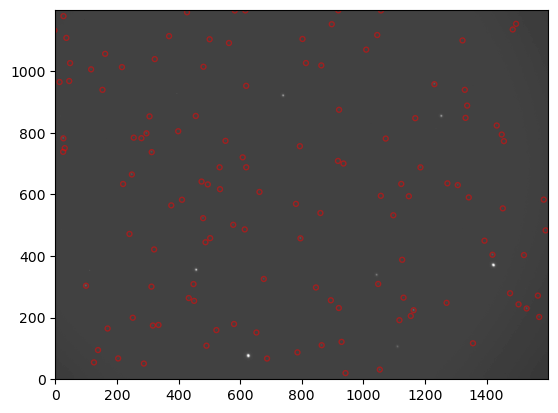

Se procesaron: 125 estrellas
....
No se pudieron determinar los radios de 68


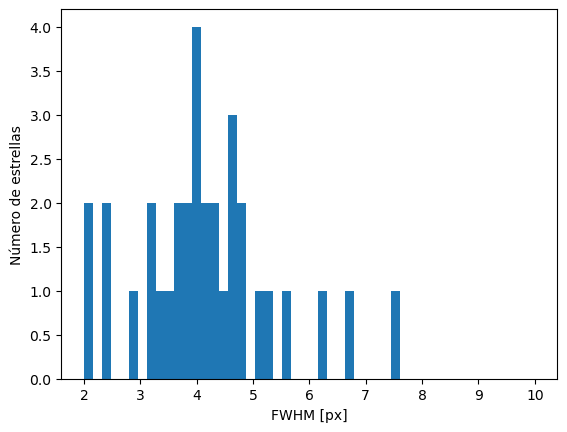

[1.15400768 2.01913033 2.05248254 2.40308794 2.47531427 2.91062561
 3.14514797 3.22166293 3.37988547 3.56230447 3.60626075 3.60640795
 3.77676036 3.83084976 3.93817256 3.99182051 4.0699467  4.07771032
 4.1400744  4.18563555 4.29254596 4.37485846 4.49393789 4.56627567
 4.58986512 4.63650036 4.7506571  4.77452103 5.08286436 5.22997443
 5.59770292 6.31171161 6.79683216 7.55538675        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan       

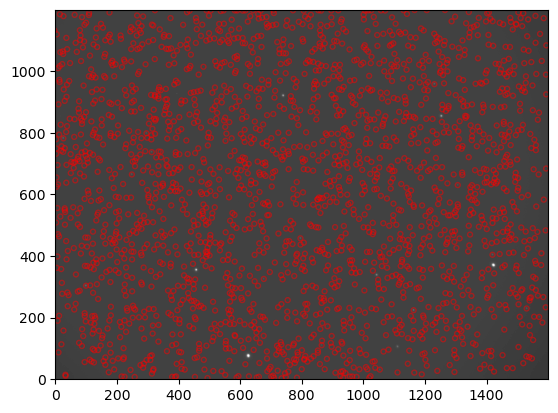

Se procesaron: 2073 estrellas
....
No se pudieron determinar los radios de 1416


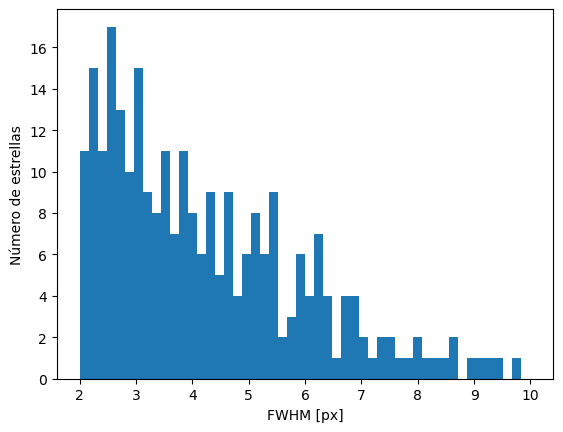

[1.00196227 1.00895521 1.00985013 ...        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 2073 estrellas  son:
....
Promedio: 3.918
....
Mediana: 3.122
....
Desviación estandar: 2.799
Procesando con FWHM=6 y threshold=8
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 43 estrellas en total


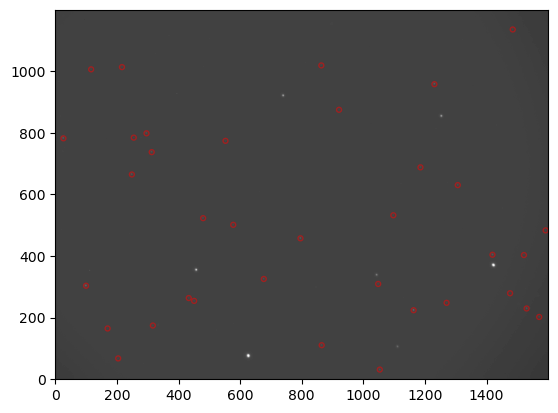

Se procesaron: 36 estrellas
....
No se pudieron determinar los radios de 24


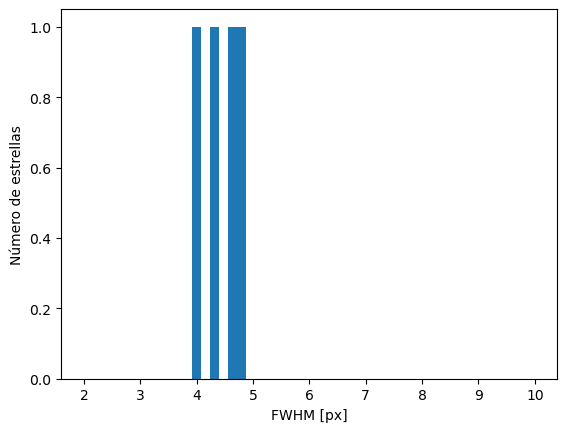

[3.93817256 4.37485846 4.63650036 4.7506571         nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 36 estrellas  son:
....
Promedio: 4.425
....
Mediana: 4.506
....
Desviación estandar: 0.312
Procesando con FWHM=6 y threshold=7
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 48 estrellas en total


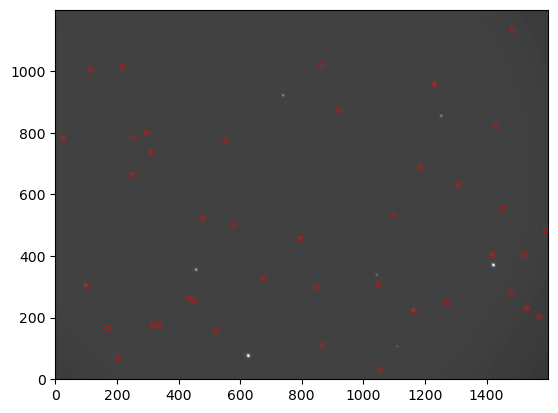

Se procesaron: 41 estrellas
....
No se pudieron determinar los radios de 26


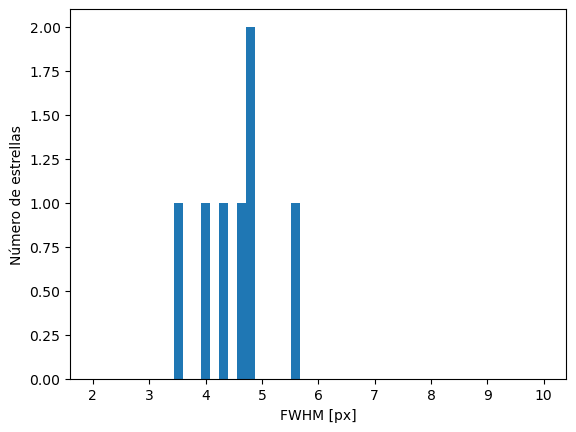

[3.56230447 3.93817256 4.37485846 4.63650036 4.7506571  4.77452103
 5.59770292        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 41 estrellas  son:
....
Promedio: 4.519
....
Mediana: 4.637
....
Desviación estandar: 0.606
Procesando con FWHM=6 y threshold=6
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 53 estrellas en total


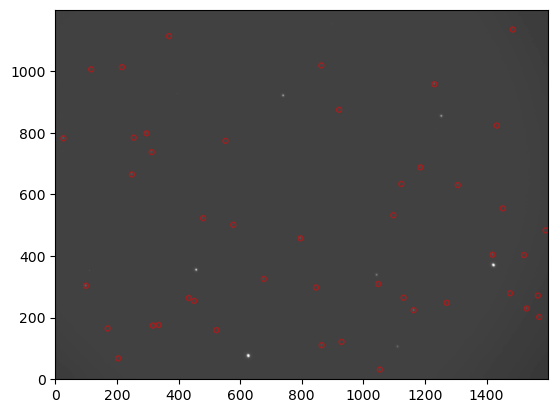

Se procesaron: 46 estrellas
....
No se pudieron determinar los radios de 27


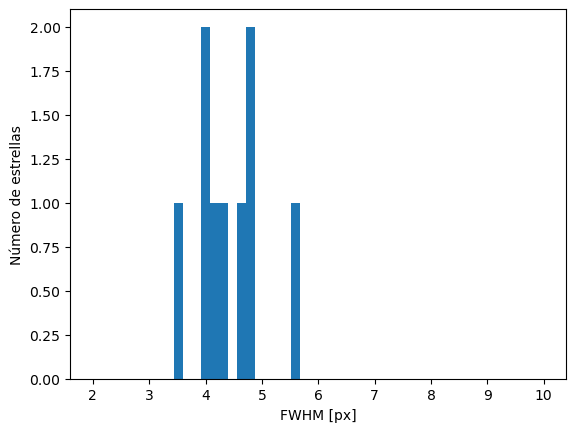

[3.56230447 3.93817256 4.07771032 4.1400744  4.37485846 4.63650036
 4.7506571  4.77452103 5.59770292        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 46 estrellas  son:
....
Promedio: 4.428
....
Mediana: 4.375
....
Desviación estandar: 0.561
Procesando con FWHM=6 y threshold=5
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 60 estrellas en total


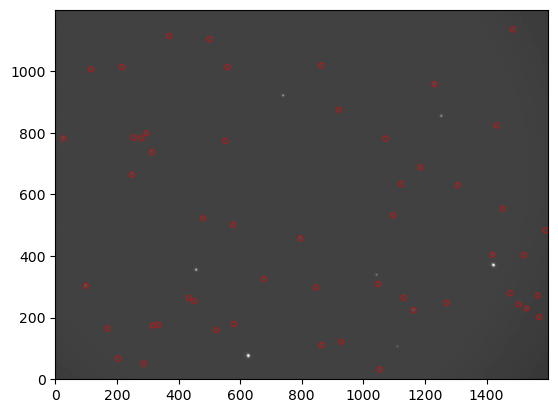

Se procesaron: 53 estrellas
....
No se pudieron determinar los radios de 30


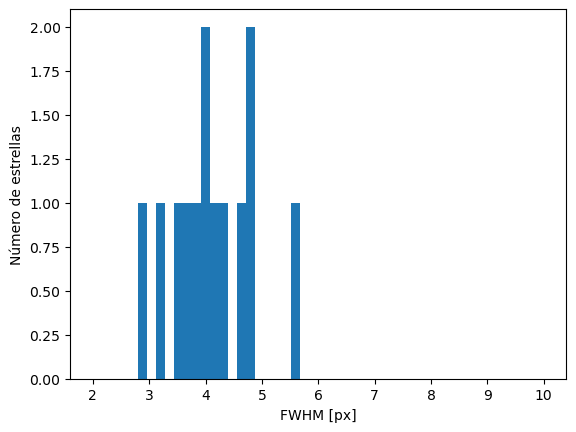

[2.91062561 3.14514797 3.56230447 3.60640795 3.83084976 3.93817256
 4.07771032 4.1400744  4.37485846 4.63650036 4.7506571  4.77452103
 5.59770292        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 53 estrellas  son:
....
Promedio: 4.104
....
Mediana: 4.078
....
Desviación estandar: 0.704
Procesando con FWHM=6 y threshold=4
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 75 estrellas en total


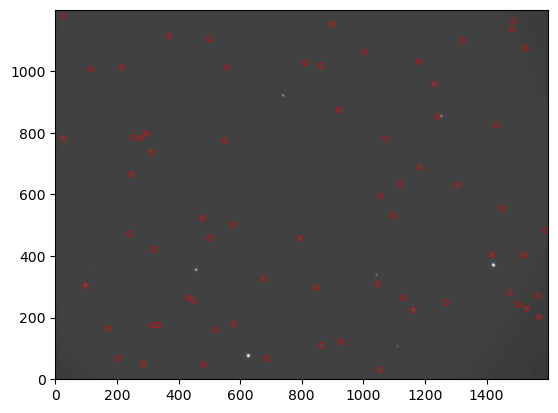

Se procesaron: 68 estrellas
....
No se pudieron determinar los radios de 37


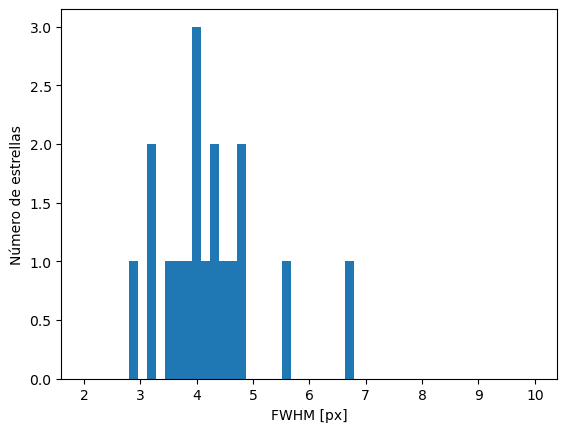

[2.91062561 3.14514797 3.22166293 3.56230447 3.60640795 3.83084976
 3.93817256 4.0699467  4.07771032 4.1400744  4.29254596 4.37485846
 4.49393789 4.63650036 4.7506571  4.77452103 5.59770292 6.79683216
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 68 estrellas  son:
....
Promedio: 4.234
....
Mediana: 4.109
....
Desviación estandar: 0.893
Procesando con FWHM=6 y threshold=3
Procesando archivo: /Users/alejandralemus/Documen

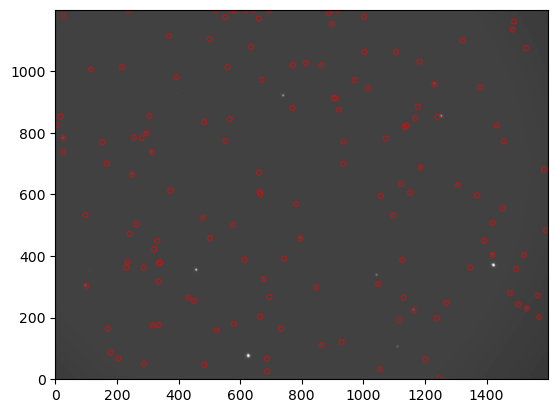

Se procesaron: 129 estrellas
....
No se pudieron determinar los radios de 75


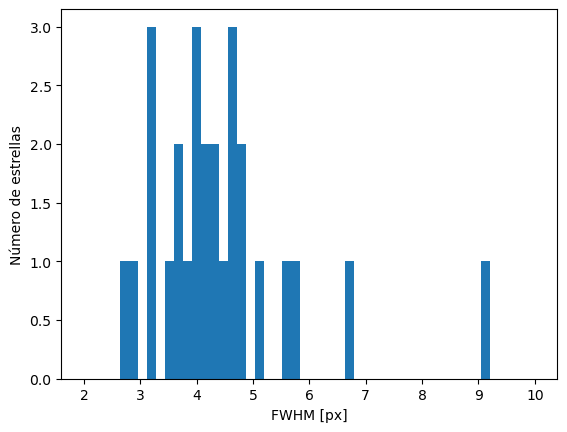

[1.50136076 1.79700824 1.86985436 1.95493731 1.97595826 2.69781536
 2.91062561 3.14514797 3.20208635 3.22166293 3.56230447 3.60626075
 3.60640795 3.83084976 3.93817256 4.0699467  4.07771032 4.1400744
 4.18563555 4.29254596 4.37485846 4.49393789 4.58986512 4.61016328
 4.63650036 4.7506571  4.77452103 5.18681186 5.59770292 5.68879441
 6.79683216 9.12628606        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        

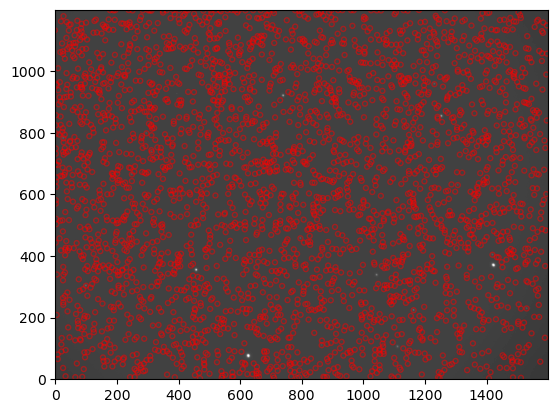

Error al ajustar la estrella 2556: Objective function has encountered a non-finite value, this will cause the fit to fail!
Please remove non-finite values from your input data before fitting to avoid this error.
Se procesaron: 2773 estrellas
....
No se pudieron determinar los radios de 1915


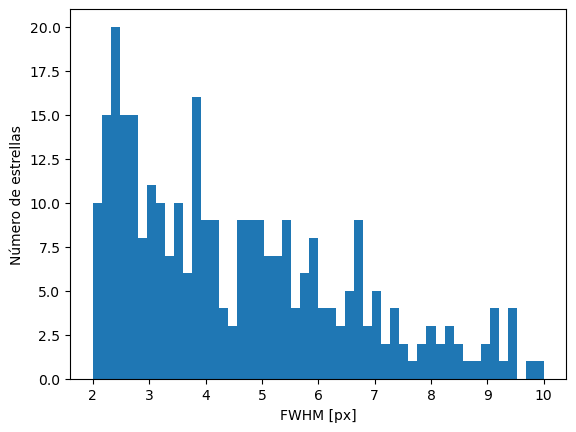

[1.00895521 1.0090996  1.01263686 ...        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 2773 estrellas  son:
....
Promedio: 4.367
....
Mediana: 3.340
....
Desviación estandar: 3.721
Procesando con FWHM=5 y threshold=8
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 43 estrellas en total


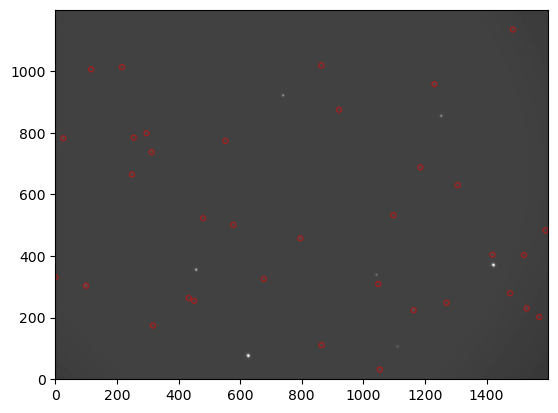

Se procesaron: 34 estrellas
....
No se pudieron determinar los radios de 23


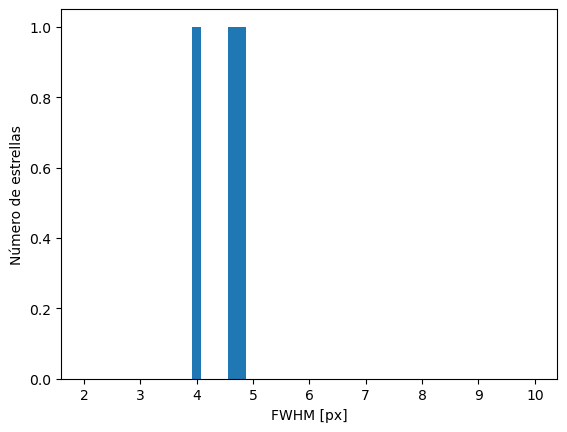

[3.93817256 4.63650036 4.7506571         nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 34 estrellas  son:
....
Promedio: 4.442
....
Mediana: 4.637
....
Desviación estandar: 0.359
Procesando con FWHM=5 y threshold=7
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 45 estrellas en total


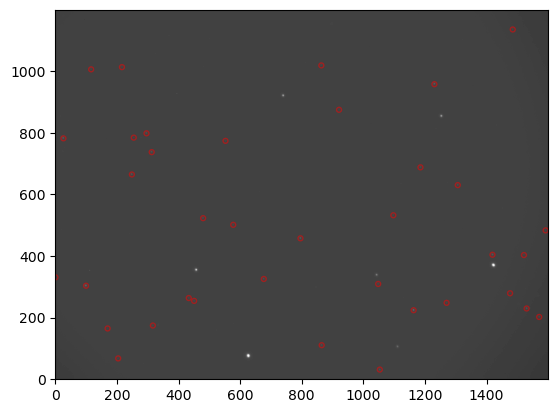

Se procesaron: 36 estrellas
....
No se pudieron determinar los radios de 24


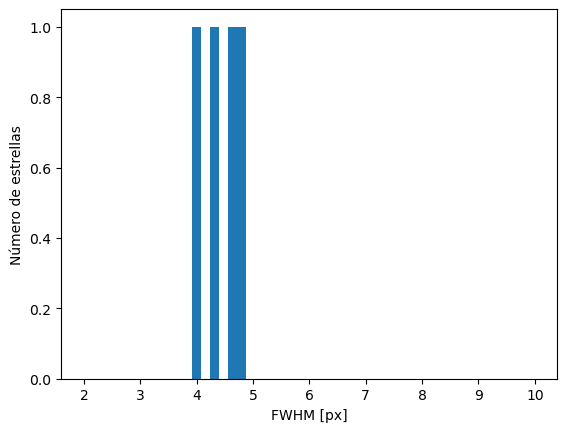

[3.93817256 4.37485846 4.63650036 4.7506571         nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 36 estrellas  son:
....
Promedio: 4.425
....
Mediana: 4.506
....
Desviación estandar: 0.312
Procesando con FWHM=5 y threshold=6
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 52 estrellas en total


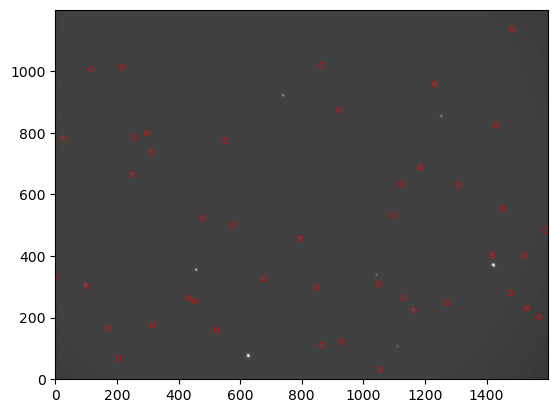

Se procesaron: 43 estrellas
....
No se pudieron determinar los radios de 26


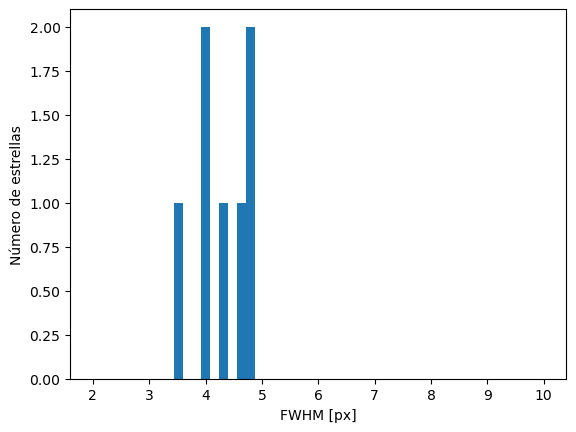

[3.56230447 3.93817256 4.07771032 4.37485846 4.63650036 4.7506571
 4.77452103        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan]
Los parámetros estadísticos de los diámetros encontrados para 43 estrellas  son:
....
Promedio: 4.302
....
Mediana: 4.375
....
Desviación estandar: 0.426
Procesando con FWHM=5 y threshold=5
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 58 estrellas en total


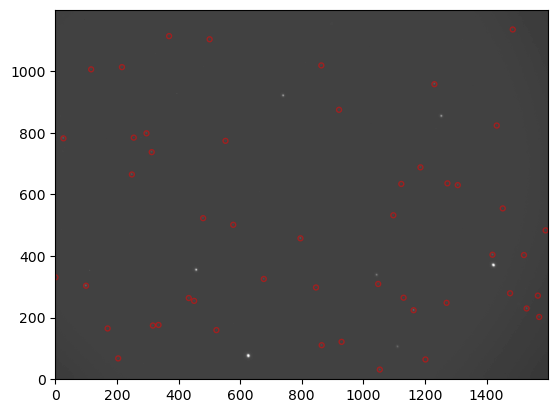

Se procesaron: 49 estrellas
....
No se pudieron determinar los radios de 28


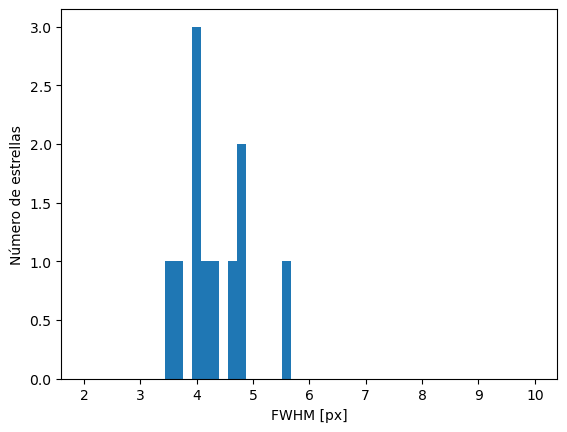

[3.56230447 3.60640795 3.93817256 3.99182051 4.07771032 4.1400744
 4.37485846 4.63650036 4.7506571  4.77452103 5.59770292        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan]
Los parámetros estadísticos de los diámetros encontrados para 49 estrellas  son:
....
Promedio: 4.314
....
Mediana: 4.140
....
Desviación estandar: 0.569
Procesando con FWHM=5 y threshold=4
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 66 estrellas en total


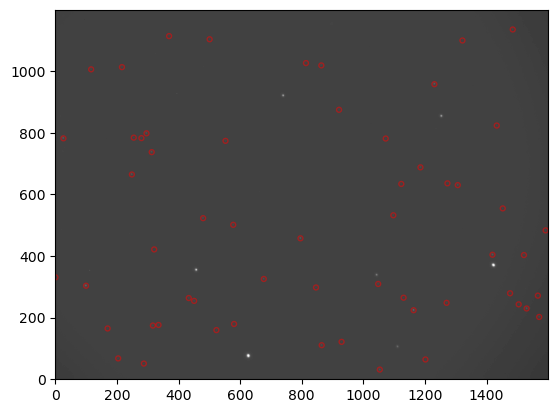

Se procesaron: 57 estrellas
....
No se pudieron determinar los radios de 31


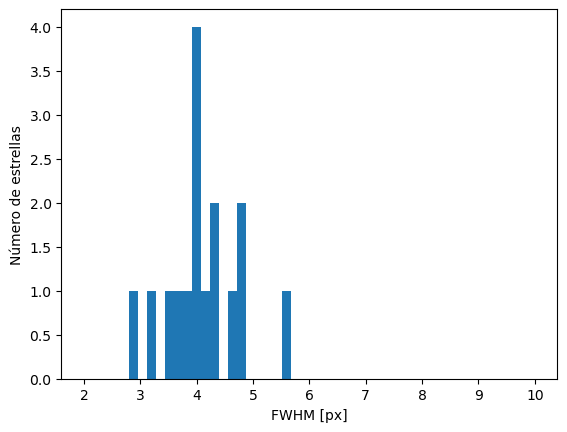

[2.91062561 3.14514797 3.56230447 3.60640795 3.83084976 3.93817256
 3.99182051 4.0699467  4.07771032 4.1400744  4.29254596 4.37485846
 4.63650036 4.7506571  4.77452103 5.59770292        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 57 estrellas  son:
....
Promedio: 4.106
....
Mediana: 4.074
....
Desviación estandar: 0.637
Procesando con FWHM=5 y threshold=3
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 132 es

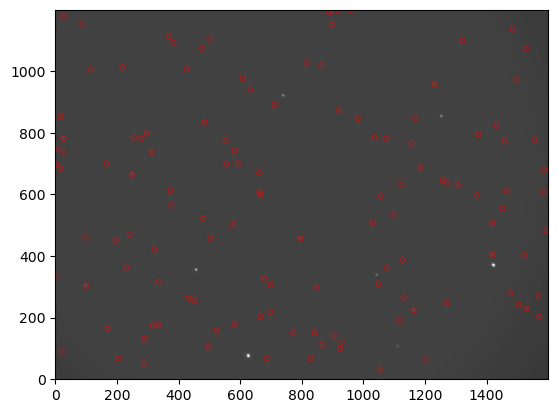

Se procesaron: 118 estrellas
....
No se pudieron determinar los radios de 68


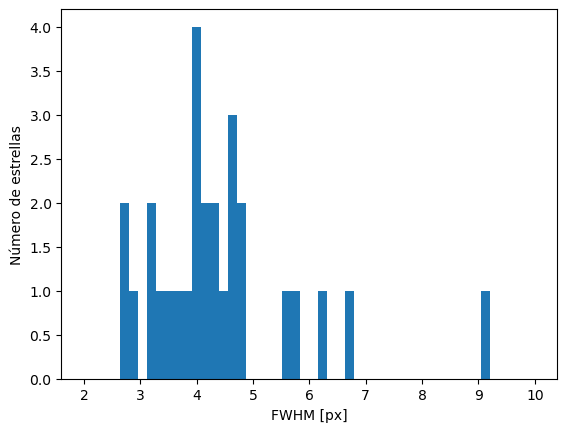

[1.01263686 1.54613056 1.79700824 1.95222496 1.98576552 2.65143619
 2.69781536 2.91062561 3.14514797 3.22166293 3.34810166 3.56230447
 3.60640795 3.83084976 3.93817256 3.99182051 4.0699467  4.07771032
 4.1400744  4.18563555 4.29254596 4.37485846 4.49393789 4.58986512
 4.61016328 4.63650036 4.7506571  4.77452103 5.59770292 5.69842582
 6.304029   6.79683216 9.12628606        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan       

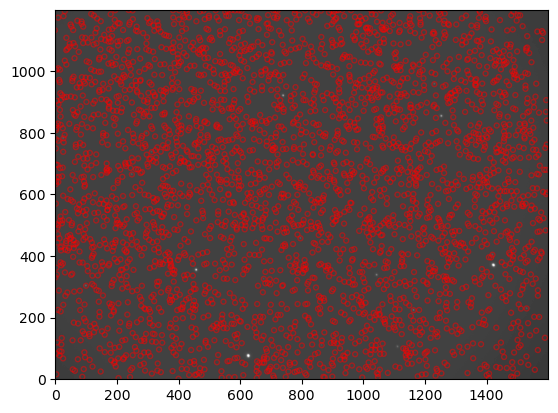

Error con FWHM=5 y threshold=2: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
Procesando con FWHM=4 y threshold=8
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 40 estrellas en total


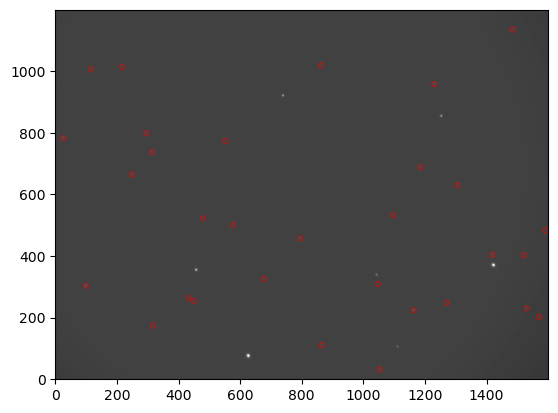

Se procesaron: 31 estrellas
....
No se pudieron determinar los radios de 20


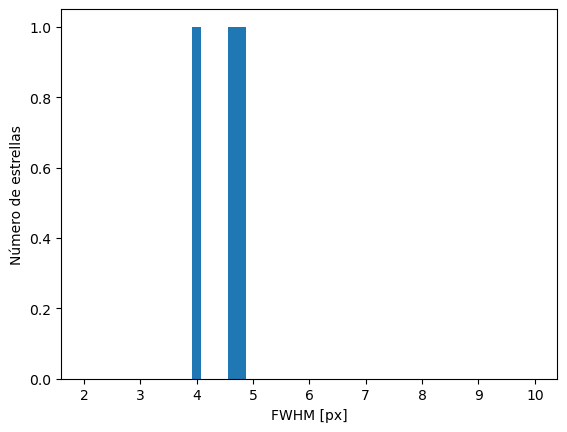

[3.93817256 4.63650036 4.7506571         nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan]
Los parámetros estadísticos de los diámetros encontrados para 31 estrellas  son:
....
Promedio: 4.442
....
Mediana: 4.637
....
Desviación estandar: 0.359
Procesando con FWHM=4 y threshold=7
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 42 estrellas en total


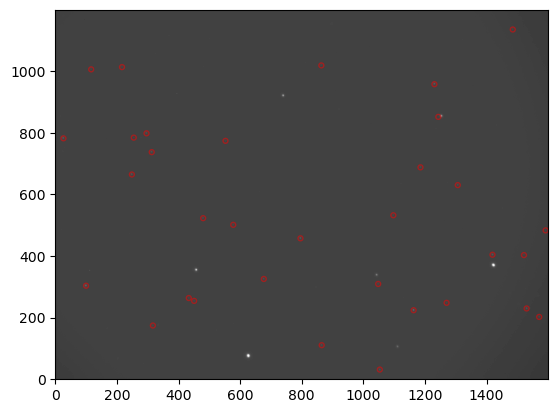

Se procesaron: 33 estrellas
....
No se pudieron determinar los radios de 22


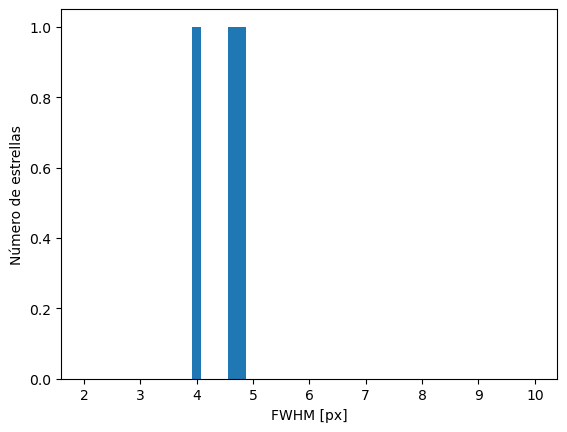

[3.93817256 4.63650036 4.7506571         nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 33 estrellas  son:
....
Promedio: 4.442
....
Mediana: 4.637
....
Desviación estandar: 0.359
Procesando con FWHM=4 y threshold=6
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 44 estrellas en total


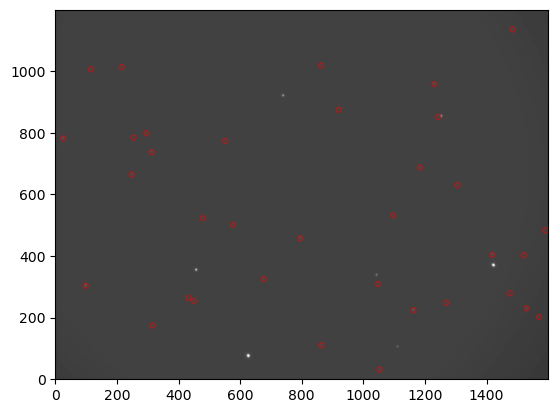

Se procesaron: 35 estrellas
....
No se pudieron determinar los radios de 24


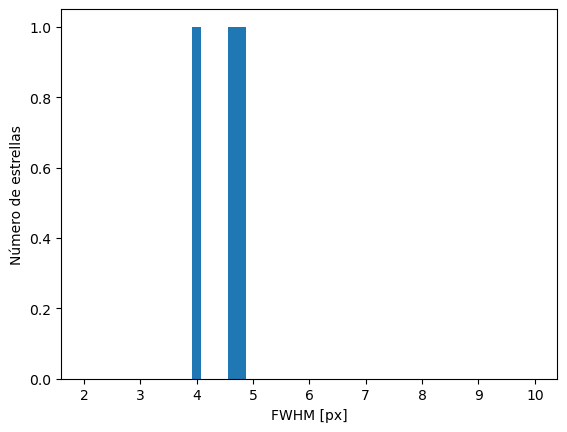

[3.93817256 4.63650036 4.7506571         nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 35 estrellas  son:
....
Promedio: 4.442
....
Mediana: 4.637
....
Desviación estandar: 0.359
Procesando con FWHM=4 y threshold=5
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 45 estrellas en total


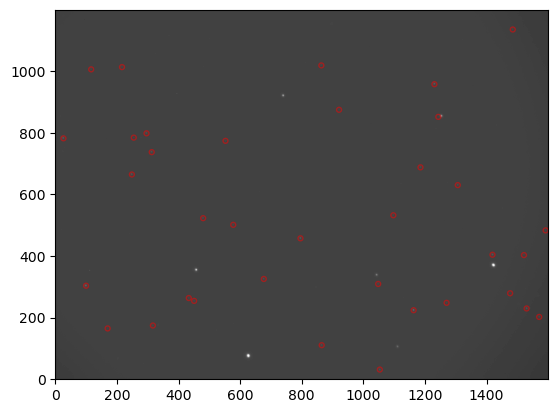

Se procesaron: 36 estrellas
....
No se pudieron determinar los radios de 24


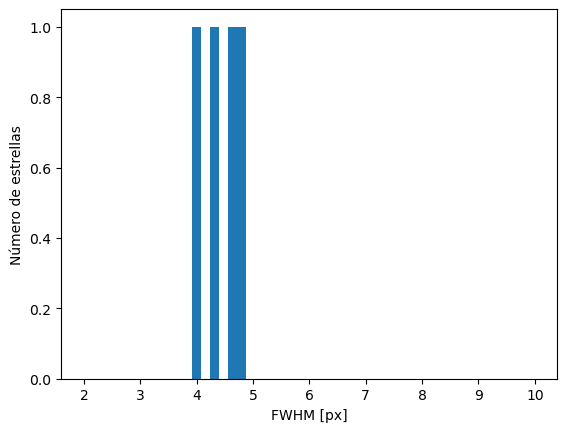

[3.93817256 4.37485846 4.63650036 4.7506571         nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 36 estrellas  son:
....
Promedio: 4.425
....
Mediana: 4.506
....
Desviación estandar: 0.312
Procesando con FWHM=4 y threshold=4
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 54 estrellas en total


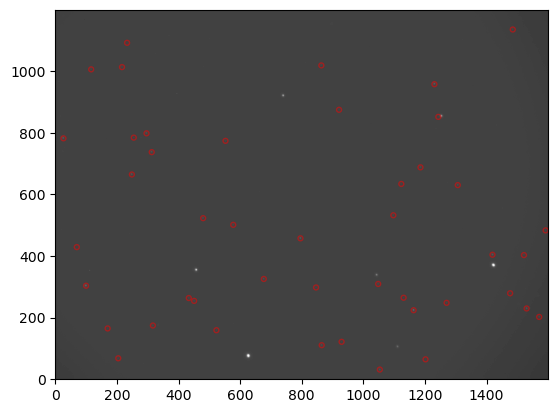

Se procesaron: 45 estrellas
....
No se pudieron determinar los radios de 28


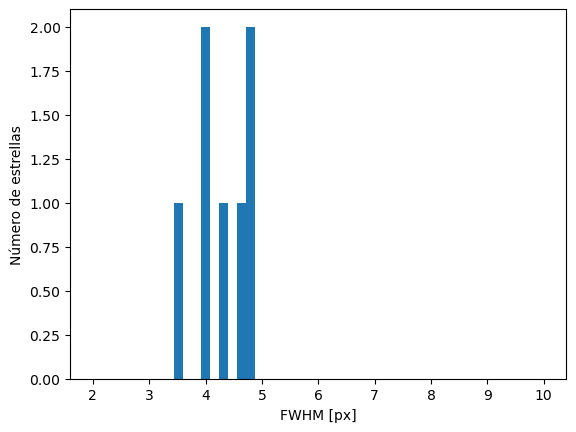

[3.56230447 3.93817256 4.07771032 4.37485846 4.63650036 4.7506571
 4.77452103        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 45 estrellas  son:
....
Promedio: 4.302
....
Mediana: 4.375
....
Desviación estandar: 0.426
Procesando con FWHM=4 y threshold=3
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 133 estrellas en total


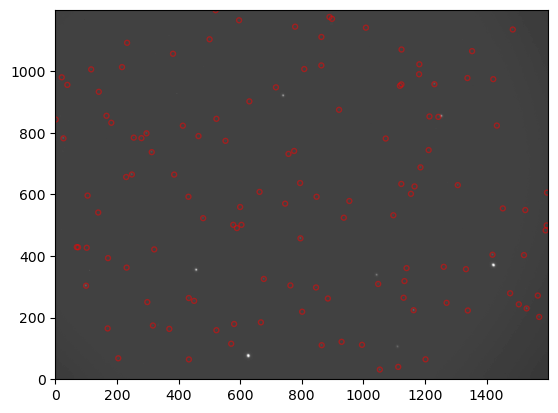

Se procesaron: 122 estrellas
....
No se pudieron determinar los radios de 69


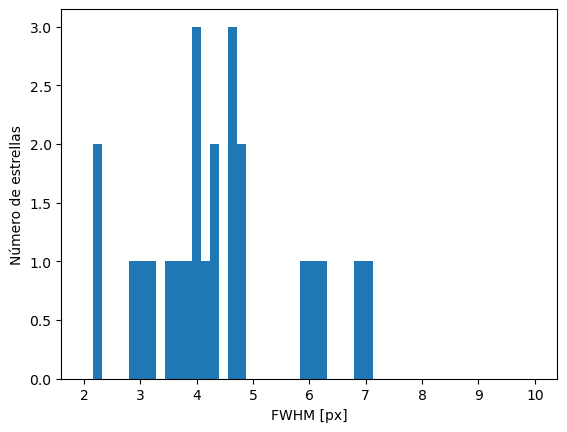

[ 1.18413493  1.39770997  1.70418556  1.8137739   2.17087503  2.23945132
  2.91062561  3.11444058  3.14514797  3.56230447  3.60640795  3.83084976
  3.93817256  3.96885374  4.07771032  4.17509868  4.27189537  4.37485846
  4.58986512  4.63650036  4.67733143  4.7506571   4.77452103  5.93993352
  6.11125821  6.25233257  6.94883584  7.0010321  10.57328614 11.86594913
 27.9403793          nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan   

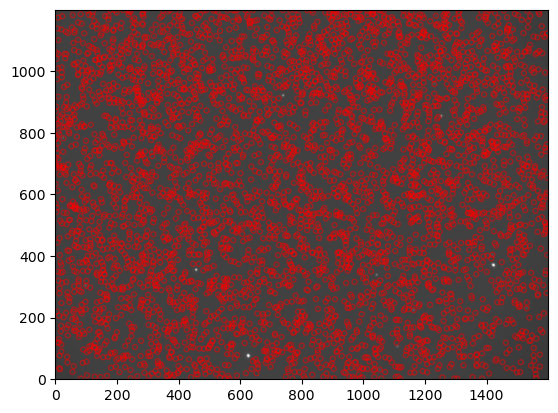

Error al ajustar la estrella 3852: Objective function has encountered a non-finite value, this will cause the fit to fail!
Please remove non-finite values from your input data before fitting to avoid this error.
Se procesaron: 4180 estrellas
....
No se pudieron determinar los radios de 2919


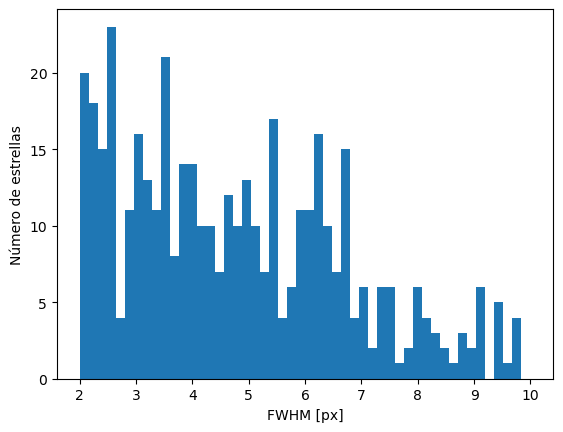

[1.00323269 1.00895521 1.01140003 ...        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 4180 estrellas  son:
....
Promedio: 4.264
....
Mediana: 3.520
....
Desviación estandar: 3.165
Procesando con FWHM=3 y threshold=8
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 34 estrellas en total


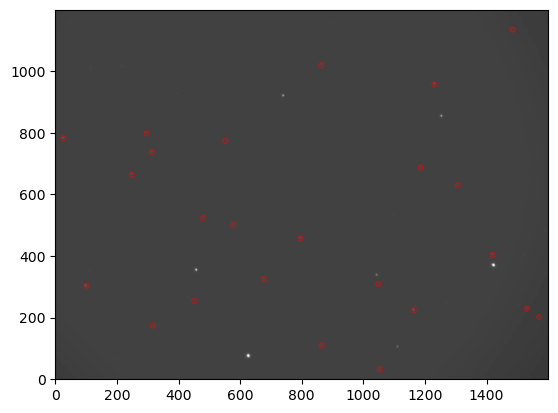

Se procesaron: 24 estrellas
....
No se pudieron determinar los radios de 15


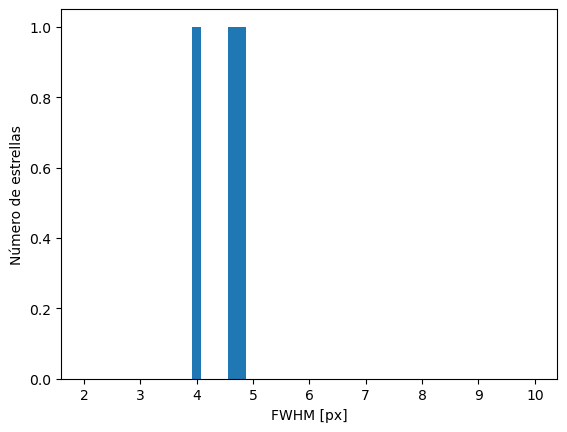

[3.93817256 4.63650036 4.7506571         nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 24 estrellas  son:
....
Promedio: 4.442
....
Mediana: 4.637
....
Desviación estandar: 0.359
Procesando con FWHM=3 y threshold=7
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 38 estrellas en total


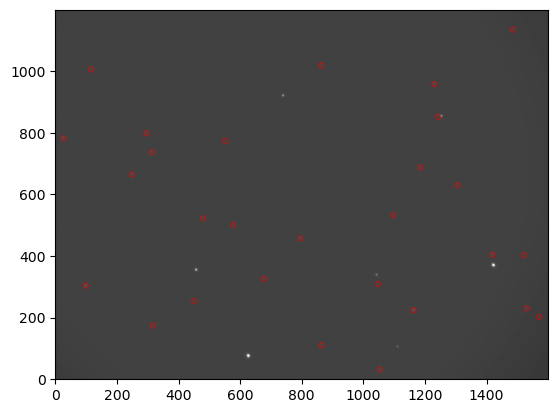

Se procesaron: 28 estrellas
....
No se pudieron determinar los radios de 18


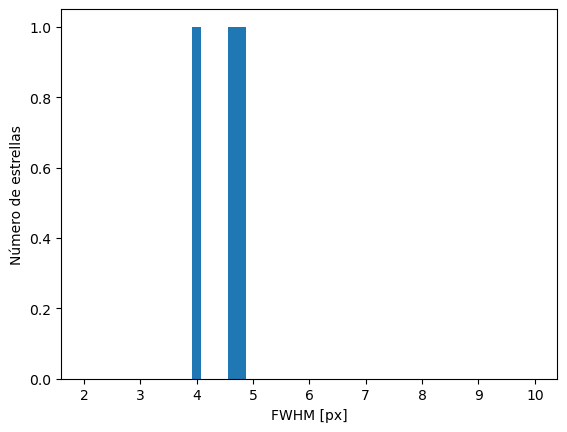

[3.93817256 4.63650036 4.7506571         nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 28 estrellas  son:
....
Promedio: 4.442
....
Mediana: 4.637
....
Desviación estandar: 0.359
Procesando con FWHM=3 y threshold=6
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 41 estrellas en total


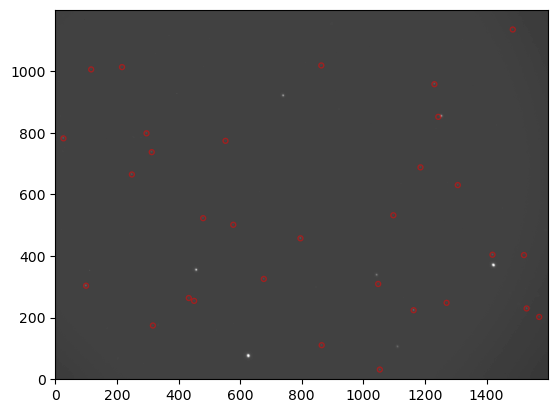

Se procesaron: 31 estrellas
....
No se pudieron determinar los radios de 20


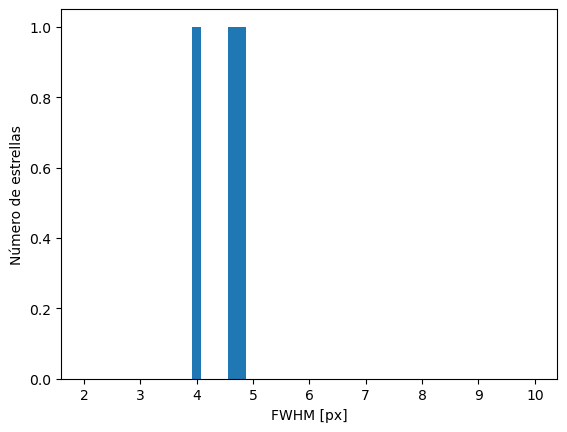

[3.93817256 4.63650036 4.7506571         nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan]
Los parámetros estadísticos de los diámetros encontrados para 31 estrellas  son:
....
Promedio: 4.442
....
Mediana: 4.637
....
Desviación estandar: 0.359
Procesando con FWHM=3 y threshold=5
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 43 estrellas en total


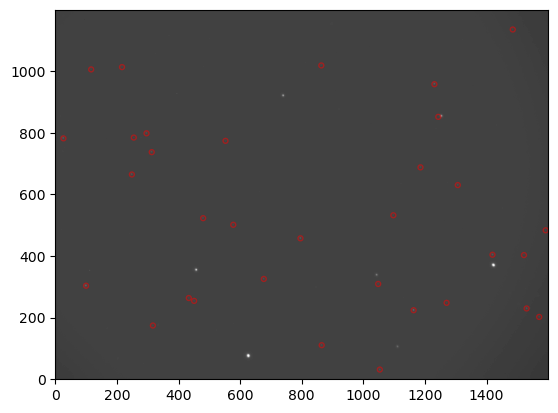

Se procesaron: 33 estrellas
....
No se pudieron determinar los radios de 22


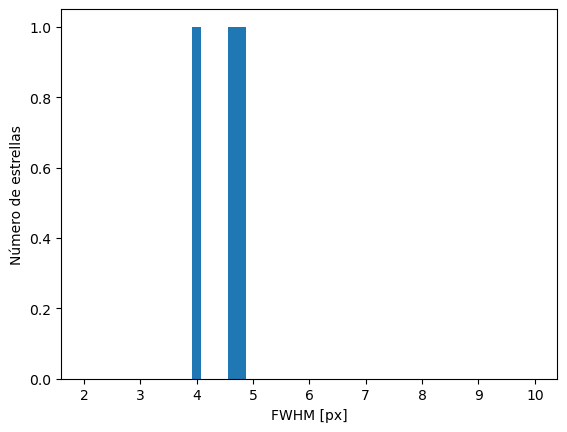

[3.93817256 4.63650036 4.7506571         nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 33 estrellas  son:
....
Promedio: 4.442
....
Mediana: 4.637
....
Desviación estandar: 0.359
Procesando con FWHM=3 y threshold=4
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 45 estrellas en total


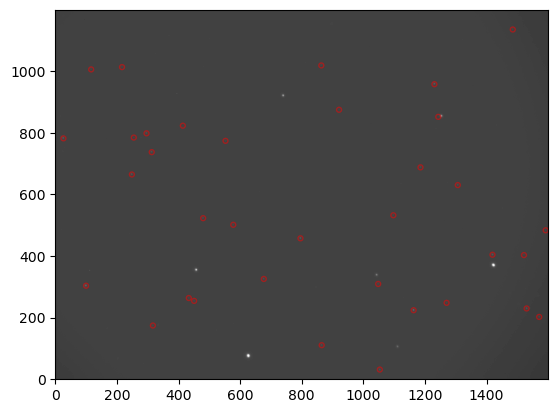

Se procesaron: 35 estrellas
....
No se pudieron determinar los radios de 23


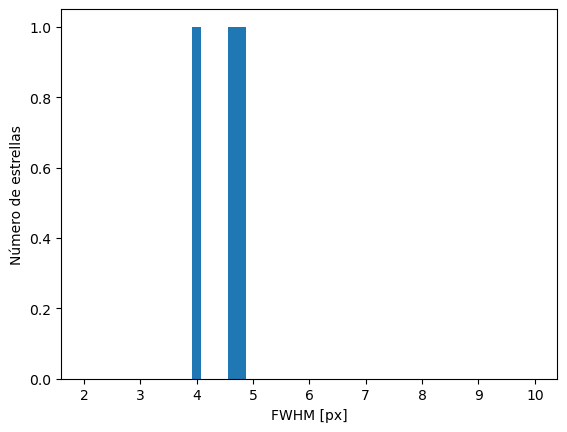

[3.93817256 4.63650036 4.7506571         nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 35 estrellas  son:
....
Promedio: 4.442
....
Mediana: 4.637
....
Desviación estandar: 0.359
Procesando con FWHM=3 y threshold=3
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 133 estrellas en total


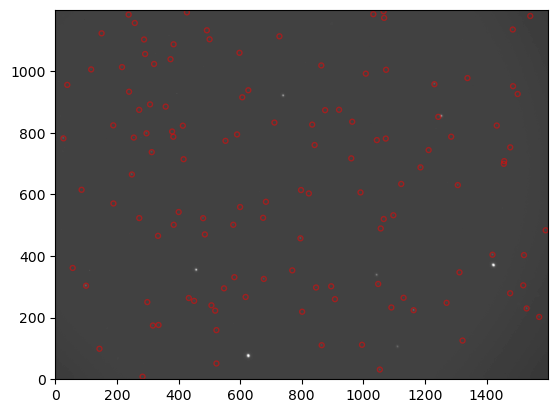

Se procesaron: 122 estrellas
....
No se pudieron determinar los radios de 74


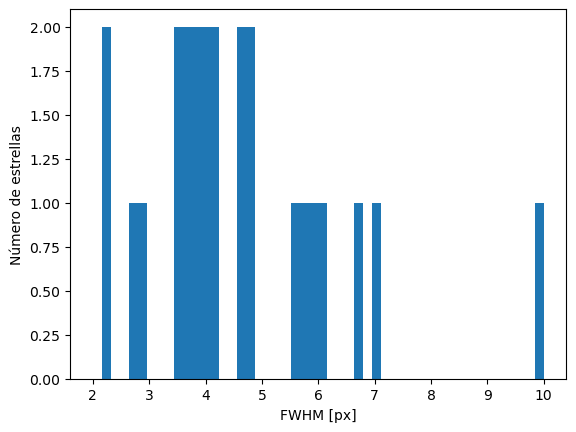

[ 2.20672581  2.31175089  2.65143619  2.91062561  3.56230447  3.58795922
  3.60640795  3.75833039  3.79885669  3.81546198  3.93817256  4.07771032
  4.17078779  4.17509868  4.63650036  4.6937097   4.7506571   4.77452103
  5.59770292  5.70641888  5.89265034  6.11125821  6.72369755  7.0010321
  9.99944038 11.21417072         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan    

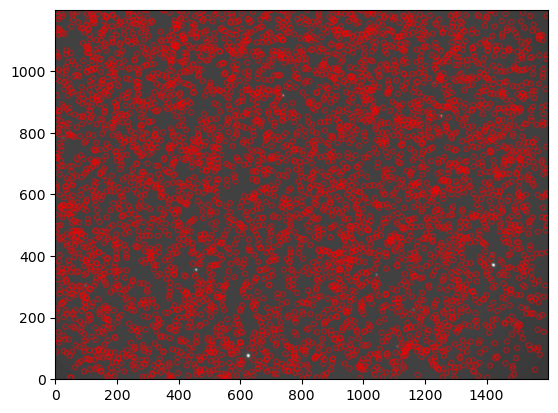

Se procesaron: 4560 estrellas
....
No se pudieron determinar los radios de 3180


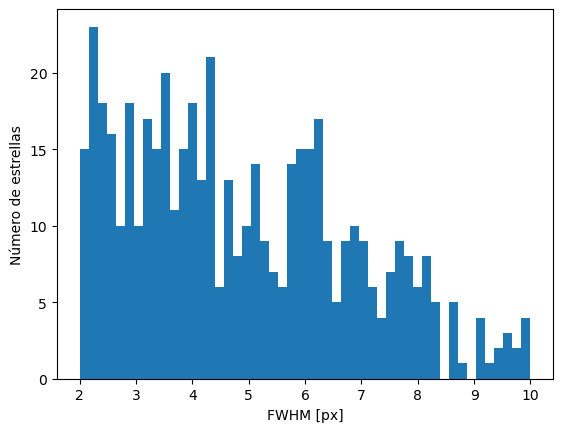

[1.00895521 1.00985013 1.01263686 ...        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 4560 estrellas  son:
....
Promedio: 4.605
....
Mediana: 3.923
....
Desviación estandar: 3.384
Procesando con FWHM=2 y threshold=8
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 33 estrellas en total


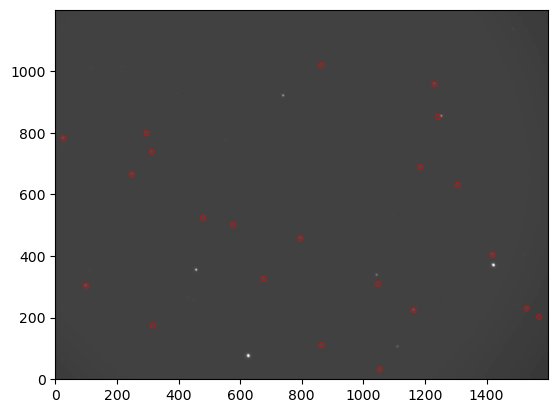

Se procesaron: 22 estrellas
....
No se pudieron determinar los radios de 15


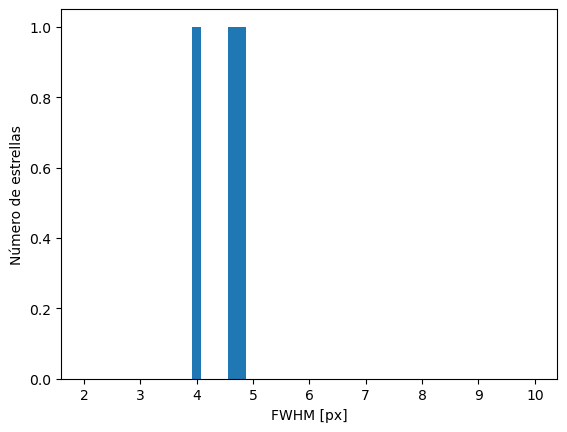

[3.93817256 4.63650036 4.7506571         nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 22 estrellas  son:
....
Promedio: 4.442
....
Mediana: 4.637
....
Desviación estandar: 0.359
Procesando con FWHM=2 y threshold=7
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 37 estrellas en total


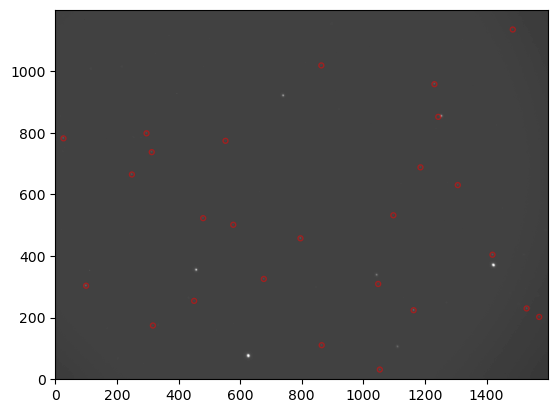

Se procesaron: 26 estrellas
....
No se pudieron determinar los radios de 17


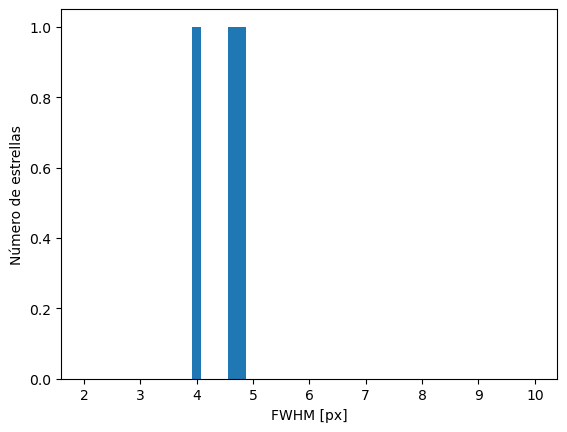

[3.93817256 4.63650036 4.7506571         nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 26 estrellas  son:
....
Promedio: 4.442
....
Mediana: 4.637
....
Desviación estandar: 0.359
Procesando con FWHM=2 y threshold=6
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 42 estrellas en total


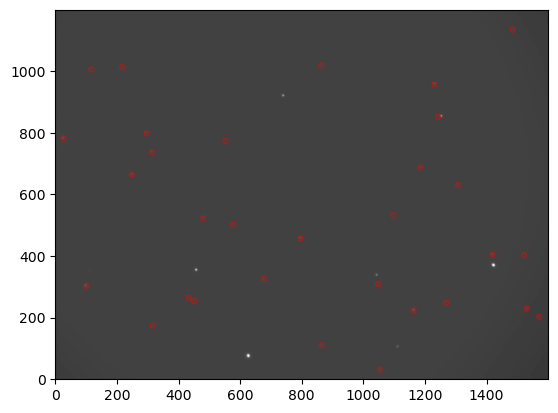

Se procesaron: 31 estrellas
....
No se pudieron determinar los radios de 20


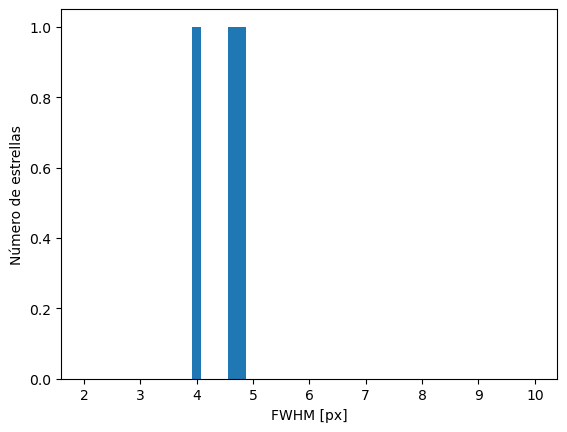

[3.93817256 4.63650036 4.7506571         nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan]
Los parámetros estadísticos de los diámetros encontrados para 31 estrellas  son:
....
Promedio: 4.442
....
Mediana: 4.637
....
Desviación estandar: 0.359
Procesando con FWHM=2 y threshold=5
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 42 estrellas en total


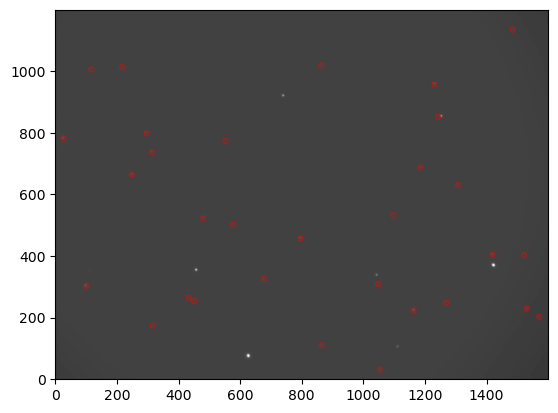

Se procesaron: 31 estrellas
....
No se pudieron determinar los radios de 20


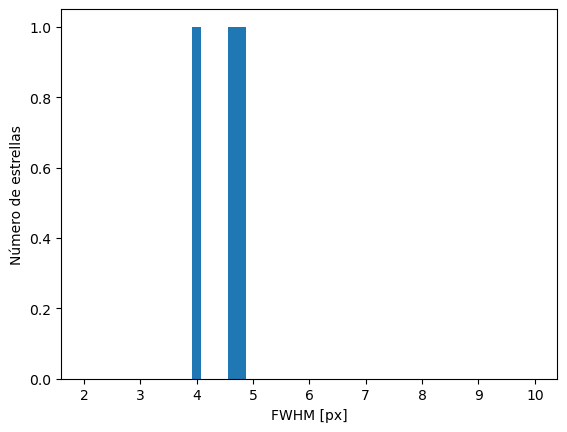

[3.93817256 4.63650036 4.7506571         nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan]
Los parámetros estadísticos de los diámetros encontrados para 31 estrellas  son:
....
Promedio: 4.442
....
Mediana: 4.637
....
Desviación estandar: 0.359
Procesando con FWHM=2 y threshold=4
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 48 estrellas en total


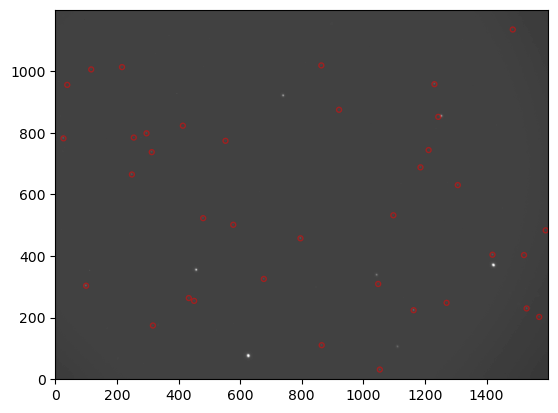

Se procesaron: 37 estrellas
....
No se pudieron determinar los radios de 24


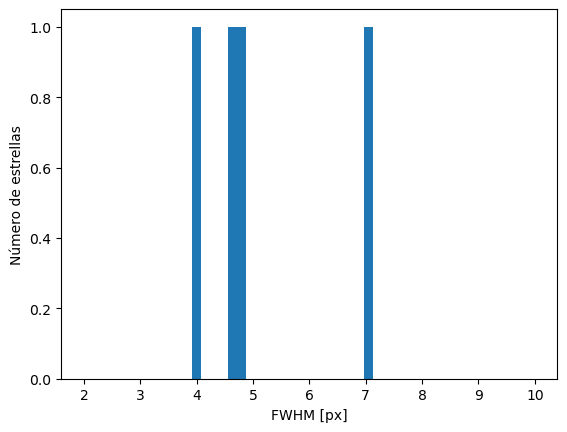

[3.93817256 4.63650036 4.7506571  7.0010321         nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan]
Los parámetros estadísticos de los diámetros encontrados para 37 estrellas  son:
....
Promedio: 5.082
....
Mediana: 4.694
....
Desviación estandar: 1.151
Procesando con FWHM=2 y threshold=3
Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Clear/Img_corr_CLear/SUM_Aligned_Stack_Filter_Clear.fits
21555.0 283.17702373457
se encontraron 136 estrellas en total


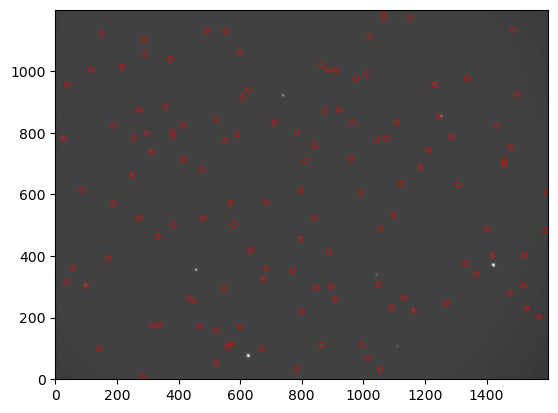

Se procesaron: 124 estrellas
....
No se pudieron determinar los radios de 80


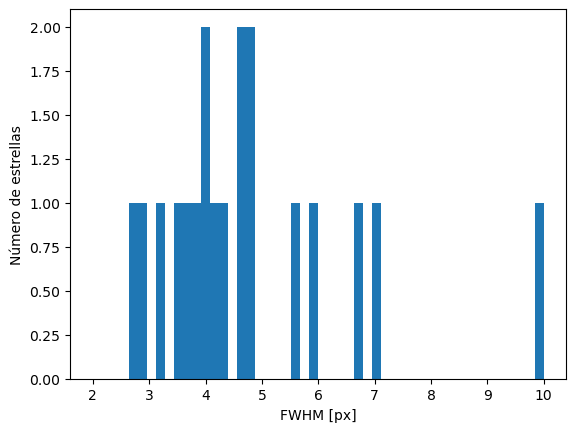

[ 1.61089095  2.65143619  2.91062561  3.27718088  3.56230447  3.75833039
  3.79885669  3.93817256  4.07771032  4.17509868  4.27971559  4.63650036
  4.6937097   4.7506571   4.77452103  5.59770292  5.89265034  6.72369755
  7.0010321   9.99944038 11.21417072         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan   

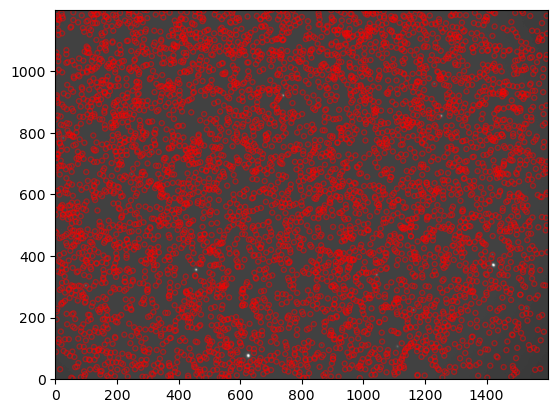

Se procesaron: 4708 estrellas
....
No se pudieron determinar los radios de 3237


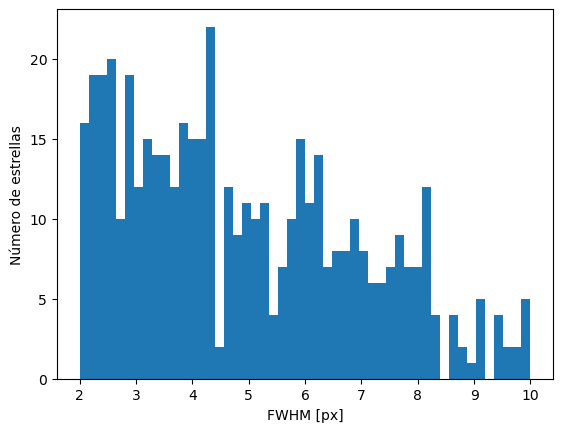

[1.01480089 1.01480089 1.01480089 ...        nan        nan        nan]
Los parámetros estadísticos de los diámetros encontrados para 4708 estrellas  son:
....
Promedio: 4.525
....
Mediana: 3.795
....
Desviación estandar: 3.351
fwhm threshold total_stars ...       median              std        
---- --------- ----------- ... ------------------ ------------------
  10         8          47 ...  4.292545957453138  0.886579909773326
  10         7          49 ...  4.216310180986507 0.8871598272602385
  10         6          54 ...  4.140074404519876 0.8633980272225452
  10         5          60 ...  4.185635554417465 0.9345206663663648
  10         4          71 ...  4.185635554417465 0.9049830209331866
  10         3         122 ...  4.228765459888056 1.5002896954072862
  10         2        1113 ...  4.278291375812999  4.109618666536663
   9         8          47 ... 4.6935787265428885 0.8635732162484658
   9         7          53 ...  4.333702208088683 0.8466157586645544
   9         

In [3]:
import numpy as np
from astropy.table import Table

# Lista de valores de FWHM y threshold
#fwhm_values = [10, 9, 8, 7, 6, 5, 4, 3, 2]
fwhm_values = [10, 9, 8, 7, 6, 5, 4, 3, 2]
#threshold_factors = [8, 7, 6, 5, 4, 3, 2]
threshold_factors = [6]

# Tabla para almacenar los resultados
results = []

# Iterar sobre los valores de FWHM y threshold
for fwhm in fwhm_values:
    for threshold_factor in threshold_factors:
        print(f"Procesando con FWHM={fwhm} y threshold={threshold_factor}")
        
        try:

            def find_star(file_path, saturation_level=65000):
                print(f"Procesando archivo: {file_path}")

                # Cargar los datos de la imagen FITS
                hdul = fits.open(file_path)
                image_data = hdul[0].data
                header = hdul[0].header
                wcs = WCS(header)  

                # Calcular la desviación estándar (ruido de fondo) de la imagen
                std, median = mad_std(image_data), np.median(image_data)
                print(median, std)

                # Detectar estrellas utilizando DAOStarFinder
                # Ajusta el valor del FWHM (FWHM de la PSF estimada) y el threshold (umbral de detección)
                daofind = DAOStarFinder(fwhm=fwhm, threshold=threshold_factor*std)
                stars = daofind(image_data- median)

                if stars is None:
                    print("No se encontraron estrellas.")
                    return None
                print(f"se encontraron {len(stars)} estrellas en total")

                # Coordenadas de las estrellas
                x_coords = stars["xcentroid"]
                y_coords = stars["ycentroid"]

                #Excluir estrellas saturadas
                non_saturated_indices = image_data[y_coords.astype(int), x_coords.astype(int)] < saturation_level
                x_coords = x_coords[non_saturated_indices]
                y_coords = y_coords[non_saturated_indices]

                # Visualización de las estrellas encontradas
                positions = np.transpose((x_coords, y_coords))  # Coordenadas de las estrellas
                #positions = np.transpose((stars["xcentroid"], stars["ycentroid"]))# coordenadas de las estrellas
                apertures = CircularAperture(positions, r=8.0)
                norm = ImageNormalize(stretch=SqrtStretch())
                plt.imshow(image_data, cmap="gray", origin="lower", norm=norm)
                apertures.plot(color="red", lw=1, alpha=0.5);
                plt.show()

                return x_coords, y_coords,image_data-median

            x, y, image_data = find_star(file_path)
            stars_find = QTable([x, y], names=('x', 'y'))

            psf_model = IntegratedGaussianPRF(flux=1, sigma=5.0 / 2.35)
            fit_shape = (21, 21)
            #finder = DAOStarFinder(6.0, 2.0)
            #psfphot = PSFPhotometry(psf_model, fit_shape, finder=finder, aperture_radius=4)
            psfphot = PSFPhotometry(psf_model, fit_shape, aperture_radius=4)

            init_params = QTable()

            init_params['x'] = x

            init_params['y'] = y

            original_image = image_data.copy()

            phot = psfphot(image_data, init_params=stars_find)

            def minmax(data):
                scaler = MinMaxScaler()
                scaler.fit(data)
                return scaler.transform(data)

            stars_tbl = Table()

            stars_tbl['x'] = phot["x_fit"]

            stars_tbl['y'] = phot["y_fit"]  

            mean_val, median_val, std_val = sigma_clipped_stats(image_data, sigma=2.0)  
            image_data = image_data.astype(np.float64) - median_val  
            field_data = NDData(image_data)

            psf_image = psfphot.make_model_image(image_data.shape)
            ns_psf_image = np.sqrt(minmax(psf_image))
            psf_field_data = NDData(psf_image)

            stars = extract_stars(field_data, stars_tbl, size=star_square_size)

            def fxn():  # Nos aseguramos de que los valores menores a 1 y mayores a 50 sean NaN
                x_fwhm = []
                y_fwhm = []
                radii = []
                for i in range(len(stars)):
                    z = np.array(stars[i])
                    y, x = np.mgrid[:z.shape[0], :z.shape[1]]

                    p_init = models.Gaussian2D()
                    fit_p = fitting.LevMarLSQFitter()
                    with warnings.catch_warnings():
                        warnings.filterwarnings('ignore', message='Model is linear in parameters', category=AstropyUserWarning)
                        #p = fit_p(p_init, x, y, z)

                    # Intentar ajustar el modelo
                        try:
                            p = fit_p(p_init, x, y, z)
                        except Exception as e:
                            print(f"Error al ajustar la estrella {i}: {e}")
                            x_fwhm.append(np.nan)
                            y_fwhm.append(np.nan)
                            radii.append(np.nan)
                            continue  # Salta a la siguiente estrella

                    # Extrae los valores ajustados de FWHM
                    x_fwhm_val = p.x_fwhm if p.x_fwhm >= 1 and p.x_fwhm <= 50 else np.nan
                    y_fwhm_val = p.y_fwhm if p.y_fwhm >= 1 and p.y_fwhm <= 50 else np.nan

                    # Guardar los valores en las listas o reemplazar con NaN
                    x_fwhm.append(x_fwhm_val)
                    y_fwhm.append(y_fwhm_val)

                    # Agrega a radii el menor de x_fwhm_val o y_fwhm_val si cumplen la condición
                    if np.isnan(x_fwhm_val) or np.isnan(y_fwhm_val):
                        radii.append(np.nan)
                    else:
                        radii.append(min(x_fwhm_val, y_fwhm_val))

                # Convierte las listas a arrays de NumPy
                x_fwhm = np.array(x_fwhm, dtype=np.float64)
                y_fwhm = np.array(y_fwhm, dtype=np.float64)
                radii = np.array(radii, dtype=np.float64)

                x_star = stars.center_flat[:, 0]
                y_star = stars.center_flat[:, 1]

                return x_star, y_star, x_fwhm, y_fwhm, radii


            #with warnings.catch_warnings(action="ignore"):
            x_star, y_star, x_fwhm, y_fwhm, radii = fxn()

            print(f"Se procesaron: {len(x_star)} estrellas")
            print("....")
            nan = np.sum(np.isnan(x_fwhm))
            print(f"No se pudieron determinar los radios de {nan}")

            plt.hist(radii, bins=50, range=(2.0,10.0))
            plt.xlabel("FWHM [px]")
            plt.ylabel("Número de estrellas")
            plt.show()
            print(np.sort(radii))

            from astropy.stats import mad_std

            filtered_radii = radii[(radii > 1)]

            # Calcular la media, mediana y desviación estándar para los valores filtrados
            mean_d, median_d, std_d = np.nanmean(filtered_radii), np.nanmedian(filtered_radii), np.nanstd(filtered_radii)



            print(f"Los parámetros estadísticos de los diámetros encontrados para {len(radii)} estrellas  son:")
            print("....")
            print(f"Promedio: {mean_d:.3f}")
            print("....")
            print(f"Mediana: {median_d:.3f}")
            print("....")
            print(f"Desviación estandar: {std_d:.3f}")

            mean_d, median_d, std_d = np.nanmean(filtered_radii), np.nanmedian(filtered_radii), np.nanstd(filtered_radii)

            # Almacenar los resultados en la tabla
            total_stars = len(x)  # Número total de estrellas procesadas
            non_determined_stars = np.sum(np.isnan(x_fwhm))  # Estrellas no determinadas
            used_stars = total_stars - non_determined_stars  # Estrellas utilizadas

        except Exception as e:
            print(f"Error con FWHM={fwhm} y threshold={threshold_factor}: {e}")
            total_stars = 0
            non_determined_stars = 0
            used_stars = 0
            mean_d = median_d = std_d = np.nan
            
        # Guardar los resultados en la tabla
        results.append({
            'fwhm': fwhm,
            'threshold': threshold_factor,
            'total_stars': total_stars,
            'non_determined': non_determined_stars,
            'used_stars': used_stars,
            'mean': mean_d,
            'median': median_d,
            'std': std_d
        })

# Crear una tabla con los resultados
results_table = Table(rows=results, names=('fwhm', 'threshold', 'total_stars', 'non_determined', 'used_stars', 'mean', 'median', 'std'))

# Mostrar la tabla con los resultados
print(results_table)

In [4]:
from astropy.table import Table

# Mostrar la tabla completa con el formato actual de astropy
print(results_table.pformat(max_lines=-1, max_width=-1))


['fwhm threshold total_stars non_determined used_stars        mean              median               std        ', '---- --------- ----------- -------------- ---------- ------------------ ------------------ -------------------', '  10         8          47             27         20 4.5396529634407505  4.292545957453138   0.886579909773326', '  10         7          49             27         22  4.461882545255452  4.216310180986507  0.8871598272602385', '  10         6          54             28         26  4.356503355249595  4.140074404519876  0.8633980272225452', '  10         5          60             31         29  4.461464558177225  4.185635554417465  0.9345206663663648', '  10         4          71             36         35  4.374712998520278  4.185635554417465  0.9049830209331866', '  10         3         122             70         52  4.497674396467786  4.228765459888056  1.5002896954072862', '  10         2        1113            722        391  4.878217689905636  4.27829137581

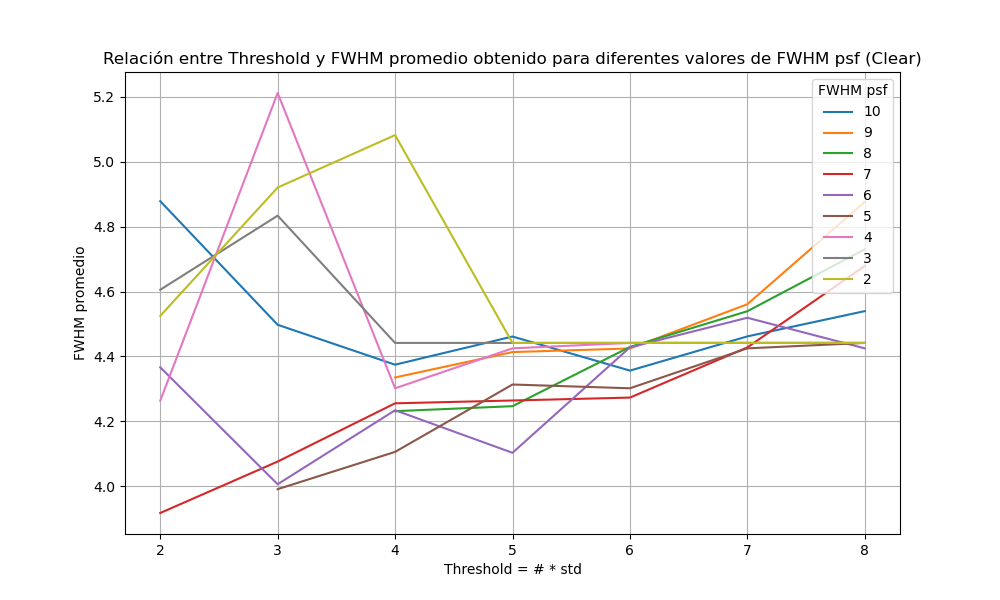

In [7]:
%matplotlib widget
import matplotlib.pyplot as plt

# Crear un diccionario para almacenar los valores de threshold y mean para cada fwhm
fwhm_threshold_means = {}

# Llenar el diccionario con los resultados de la tabla
for row in results_table:
    fwhm = row['fwhm']
    threshold = row['threshold']
    mean = row['mean']

    if fwhm not in fwhm_threshold_means:
        fwhm_threshold_means[fwhm] = {'threshold': [], 'mean': []}

    fwhm_threshold_means[fwhm]['threshold'].append(threshold)
    fwhm_threshold_means[fwhm]['mean'].append(mean)

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar para cada valor de fwhm
for fwhm, data in fwhm_threshold_means.items():
    plt.plot(data['threshold'], data['mean'], label=f'{fwhm}')

# Personalizar la gráfica
#plt.title('Relación entre Threshold y FWHM promedio obtenido para diferentes valores de FWHM psf (FILTRO B)')
#plt.title('Relación entre Threshold y FWHM promedio obtenido para diferentes valores de FWHM psf (FILTRO V)')
#plt.title('Relación entre Threshold y FWHM promedio obtenido para diferentes valores de FWHM psf (FILTRO R)')
#plt.title('Relación entre Threshold y FWHM promedio obtenido para diferentes valores de FWHM psf (FILTRO I)')
plt.title('Relación entre Threshold y FWHM promedio obtenido para diferentes valores de FWHM psf (Clear)')


plt.xlabel('Threshold = # * std')
plt.ylabel('FWHM promedio')
plt.legend(title='FWHM psf', loc= "upper right")
plt.grid(True)

# Mostrar la gráfica
plt.show()


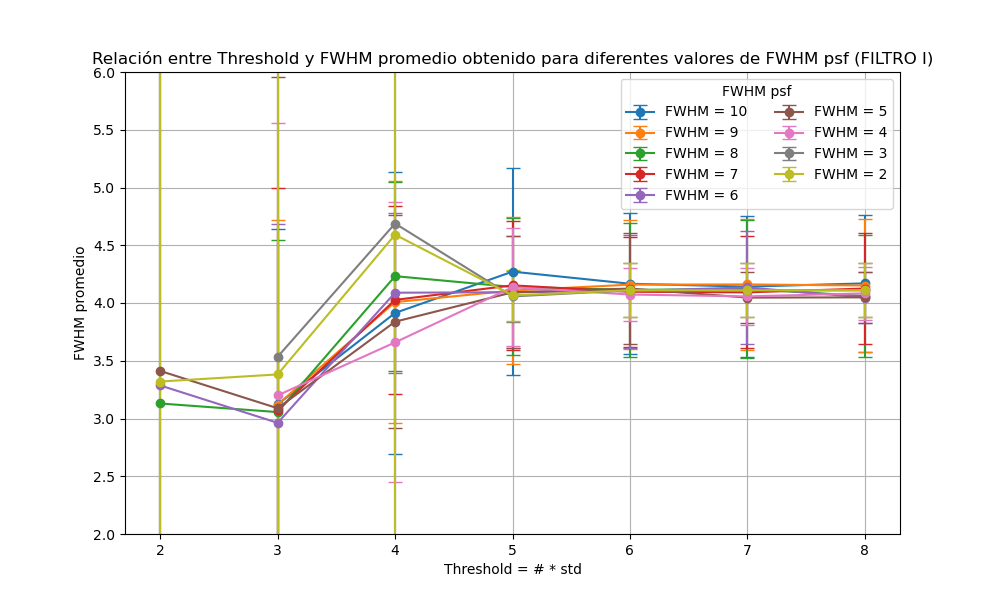

In [7]:
%matplotlib widget
import matplotlib.pyplot as plt

# Crear un diccionario para almacenar los valores de threshold, mean y std para cada fwhm
fwhm_threshold_means = {}

# Llenar el diccionario con los resultados de la tabla
for row in results_table:
    fwhm = row['fwhm']
    threshold = row['threshold']
    mean = row['mean']
    std = row['std']  # Suponiendo que tienes una columna de std

    if fwhm not in fwhm_threshold_means:
        fwhm_threshold_means[fwhm] = {'threshold': [], 'mean': [], 'std': []}

    fwhm_threshold_means[fwhm]['threshold'].append(threshold)
    fwhm_threshold_means[fwhm]['mean'].append(mean)
    fwhm_threshold_means[fwhm]['std'].append(std)

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar para cada valor de fwhm con barras de error
for fwhm, data in fwhm_threshold_means.items():
    plt.errorbar(data['threshold'], data['mean'], yerr=data['std'], label=f'FWHM = {fwhm}', fmt='-o', capsize=5)

# Personalizar la gráfica
plt.ylim(2,6)
#plt.title('Relación entre Threshold y FWHM promedio obtenido para diferentes valores de FWHM psf (FILTRO B)')
#plt.title('Relación entre Threshold y FWHM promedio obtenido para diferentes valores de FWHM psf (FILTRO V)')
#plt.title('Relación entre Threshold y FWHM promedio obtenido para diferentes valores de FWHM psf (FILTRO R)')
plt.title('Relación entre Threshold y FWHM promedio obtenido para diferentes valores de FWHM psf (FILTRO I)')

plt.xlabel('Threshold = # * std')
plt.ylabel('FWHM promedio')
plt.legend(title='FWHM psf', ncol=2)
plt.grid(True)

# Mostrar la gráfica
plt.show()

Procesando archivo: /Users/alejandralemus/Documents/diciembre 20 2024/Filtro B/Img_corr_B/SUM_Astro_Filter_B.fits
8376.0 182.36007287618904
se encontraron 41 estrellas en total


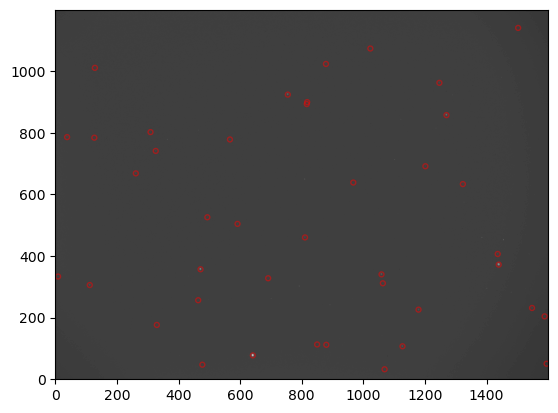

In [13]:
def find_star(file_path, saturation_level=65000):
    print(f"Procesando archivo: {file_path}")

    # Cargar los datos de la imagen FITS
    hdul = fits.open(file_path)
    image_data = hdul[0].data
    header = hdul[0].header
    wcs = WCS(header)  

    # Calcular la desviación estándar (ruido de fondo) de la imagen
    std, median = mad_std(image_data), np.median(image_data)
    print(median, std)
    
    # Detectar estrellas utilizando DAOStarFinder
    # Ajusta el valor del FWHM (FWHM de la PSF estimada) y el threshold (umbral de detección)
    daofind = DAOStarFinder(fwhm=6.0, threshold=4.0*std)
    stars = daofind(image_data- median)

    if stars is None:
        print("No se encontraron estrellas.")
        return None
    print(f"se encontraron {len(stars)} estrellas en total")

    # Coordenadas de las estrellas
    x_coords = stars["xcentroid"]
    y_coords = stars["ycentroid"]
    
    # Filtrar las estrellas saturadas #MODIFICACION
    non_saturated_indices = image_data[y_coords.astype(int), x_coords.astype(int)] < saturation_level
    x_coords = x_coords[non_saturated_indices]
    y_coords = y_coords[non_saturated_indices]

    ## Visualizacion de las estrellas encontradas
    positions = np.transpose((stars["xcentroid"], stars["ycentroid"]))# coordenadas de las estrellas
    apertures = CircularAperture(positions, r=8.0)
    norm = ImageNormalize(stretch=SqrtStretch())
    plt.imshow(image_data, cmap="gray", origin="lower", norm=norm)
    apertures.plot(color="red", lw=1, alpha=0.5);
    plt.show()

    return x_coords, y_coords,image_data-median

x, y, image_data = find_star(file_path)
stars_find = QTable([x, y], names=('x', 'y'))

In [14]:
psf_model = IntegratedGaussianPRF(flux=1, sigma=5.0 / 2.35)
fit_shape = (21, 21)
#finder = DAOStarFinder(6.0, 2.0)
#psfphot = PSFPhotometry(psf_model, fit_shape, finder=finder, aperture_radius=4)
psfphot = PSFPhotometry(psf_model, fit_shape, aperture_radius=4)

init_params = QTable()

init_params['x'] = x

init_params['y'] = y

original_image = image_data.copy()

phot = psfphot(image_data, init_params=stars_find)

def minmax(data):
    scaler = MinMaxScaler()
    scaler.fit(data)
    return scaler.transform(data)

stars_tbl = Table()

stars_tbl['x'] = phot["x_fit"]

stars_tbl['y'] = phot["y_fit"]  

mean_val, median_val, std_val = sigma_clipped_stats(image_data, sigma=2.0)  
image_data = image_data.astype(np.float64) - median_val  
field_data = NDData(image_data)

psf_image = psfphot.make_model_image(image_data.shape)
ns_psf_image = np.sqrt(minmax(psf_image))
psf_field_data = NDData(psf_image)

stars = extract_stars(field_data, stars_tbl, size=star_square_size)

In [15]:
def fxn():  # Nos aseguramos de que los valores menores a 1 y mayores a 50 sean NaN
    x_fwhm = []
    y_fwhm = []
    radii = []
    for i in range(len(stars)):
        z = np.array(stars[i])
        y, x = np.mgrid[:z.shape[0], :z.shape[1]]
        
        p_init = models.Gaussian2D()
        fit_p = fitting.LevMarLSQFitter()
        with warnings.catch_warnings():
            warnings.filterwarnings('ignore', message='Model is linear in parameters', category=AstropyUserWarning)
            #p = fit_p(p_init, x, y, z)

        # Intentar ajustar el modelo
            try:
                p = fit_p(p_init, x, y, z)
            except Exception as e:
                print(f"Error al ajustar la estrella {i}: {e}")
                x_fwhm.append(np.nan)
                y_fwhm.append(np.nan)
                radii.append(np.nan)
                continue  # Salta a la siguiente estrella
        
        # Extrae los valores ajustados de FWHM
        x_fwhm_val = p.x_fwhm if p.x_fwhm >= 1 and p.x_fwhm <= 50 else np.nan
        y_fwhm_val = p.y_fwhm if p.y_fwhm >= 1 and p.y_fwhm <= 50 else np.nan
        
        # Guardar los valores en las listas o reemplazar con NaN
        x_fwhm.append(x_fwhm_val)
        y_fwhm.append(y_fwhm_val)
        
        # Agrega a radii el menor de x_fwhm_val o y_fwhm_val si cumplen la condición
        if np.isnan(x_fwhm_val) or np.isnan(y_fwhm_val):
            radii.append(np.nan)
        else:
            radii.append(min(x_fwhm_val, y_fwhm_val))
    
    # Convierte las listas a arrays de NumPy
    x_fwhm = np.array(x_fwhm, dtype=np.float64)
    y_fwhm = np.array(y_fwhm, dtype=np.float64)
    radii = np.array(radii, dtype=np.float64)
    
    x_star = stars.center_flat[:, 0]
    y_star = stars.center_flat[:, 1]

    return x_star, y_star, x_fwhm, y_fwhm, radii


#with warnings.catch_warnings(action="ignore"):
x_star, y_star, x_fwhm, y_fwhm, radii = fxn()

print(f"Se procesaron: {len(x_star)} estrellas")
print("....")
nan = np.sum(np.isnan(x_fwhm))
print(f"No se pudieron determinar los radios de {nan}")


Se procesaron: 40 estrellas
....
No se pudieron determinar los radios de 19


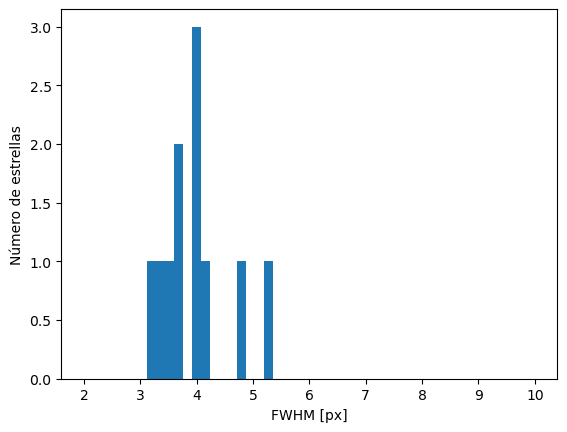

[1.68858843 3.22526964 3.43166182 3.54481369 3.64691125 3.66287518
 3.92331758 3.98664192 4.05312413 4.10955962 4.81370311 5.34429773
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan]


In [16]:
plt.hist(radii, bins=50, range=(2.0,10.0))
plt.xlabel("FWHM [px]")
plt.ylabel("Número de estrellas")
plt.show()
print(np.sort(radii))

In [17]:
from astropy.stats import mad_std

filtered_radii = radii[(radii > 1)]

# Calcular la media, mediana y desviación estándar para los valores filtrados
mean_d, median_d, std_d = np.nanmean(filtered_radii), np.nanmedian(filtered_radii), np.nanstd(filtered_radii)



print(f"Los parámetros estadísticos de los diámetros encontrados para {len(radii)} estrellas  son:")
print("....")
print(f"Promedio: {mean_d:.3f}")
print("....")
print(f"Mediana: {median_d:.3f}")
print("....")
print(f"Desviación estandar: {std_d:.3f}")

Los parámetros estadísticos de los diámetros encontrados para 40 estrellas  son:
....
Promedio: 3.786
....
Mediana: 3.793
....
Desviación estandar: 0.849
